# Week 5
# Aidin Attar - 2048654

### Table of contents:
- [Libraries](#lib)
- [Exercise 1 - Detecting a disease](#ex1)
    - [(a) - Probability distribution  of the new method](#ex1a)
    - [(b) - Frequentist estimation of the failure](#ex1b)
    - [(c) - Bayesian computation of the posterior probability](#ex1c)
    - [(d) - Hypothesis Test (Bayesian approach)](#ex1d)
    - [(e) - Hypothesis Test (Frequentist approach) ](#ex1e)
- [Exercise 2 - Deaths by horse kick among the Prussian army](#ex2)
    - [(a) - Death rate's distribution (Uniform Prior)](#ex2a)
    - [(b) - Death rate's distribution (Jeffrey's Prior)](#ex2b)
- [Exercise 3 - Water quality of streams](#ex3)
    - [(a) - Frequentist estimator](#ex3a)
    - [(b) - Posterior distribution with beta prior](#ex3b)
    - [(c) - Bayesian estimator](#ex3c)
    - [(d) - Hypotesis test](#ex3d)
    - [(e) - Frequentist estimator](#ex3e)
    - [(f) - Bayesian estimator with Beta prior and custom prior](#ex3f)
    - [(g) - Mean and variance](#ex3g)
    - [(h) - Hypotesis test](#ex3h)
- [Exercise 4 - Ex1 with MCMC with JAGS](#ex4)
- [Exercise 5 - Ex2 with MCMC with JAGS](#ex5)
- [Exercise 6 - Ex3 with MCMC with JAGS](#ex6)

## Libraries<a class="anchor" id="lib"></a>

In [1]:
library(rjags)
library(coda)
library(ggplot2)
library(gridExtra)
library(ggthemes)
library(ggtext)
library(dplyr)

Loading required package: coda

Linked to JAGS 4.3.0

Loaded modules: basemod,bugs


Attaching package: 'dplyr'


The following object is masked from 'package:gridExtra':

    combine


The following objects are masked from 'package:stats':

    filter, lag


The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union




## Exercise 1 - Detecting a disease<a class="anchor" id="ex1"></a>

In [2]:
p.old <- .15
n     <- 75

### Exercise 1a - Probability distribution  of the new method<a class="anchor" id="ex1a"></a>
We assume an uniform prior: the likelihood will be a binomial distribution and so the posterior pdf is simply proportional to the likelihood. Thus the probability distribution of y follows a binomial distribution.

### Exercise 1b - Frequentist estimation of the failure<a class="anchor" id="ex1b"></a>

In [3]:
y  <- 6
pf <- y / n
cat("The frequentist estimator of the failure probability of the new method is:\n", pf)

The frequentist estimator of the failure probability of the new method is:
 0.08

### Exercise 1c - Bayesian computation of the posterior probability<a class="anchor" id="ex1c"></a>

Warning message:
"Removed 700 row(s) containing missing values (geom_path)."


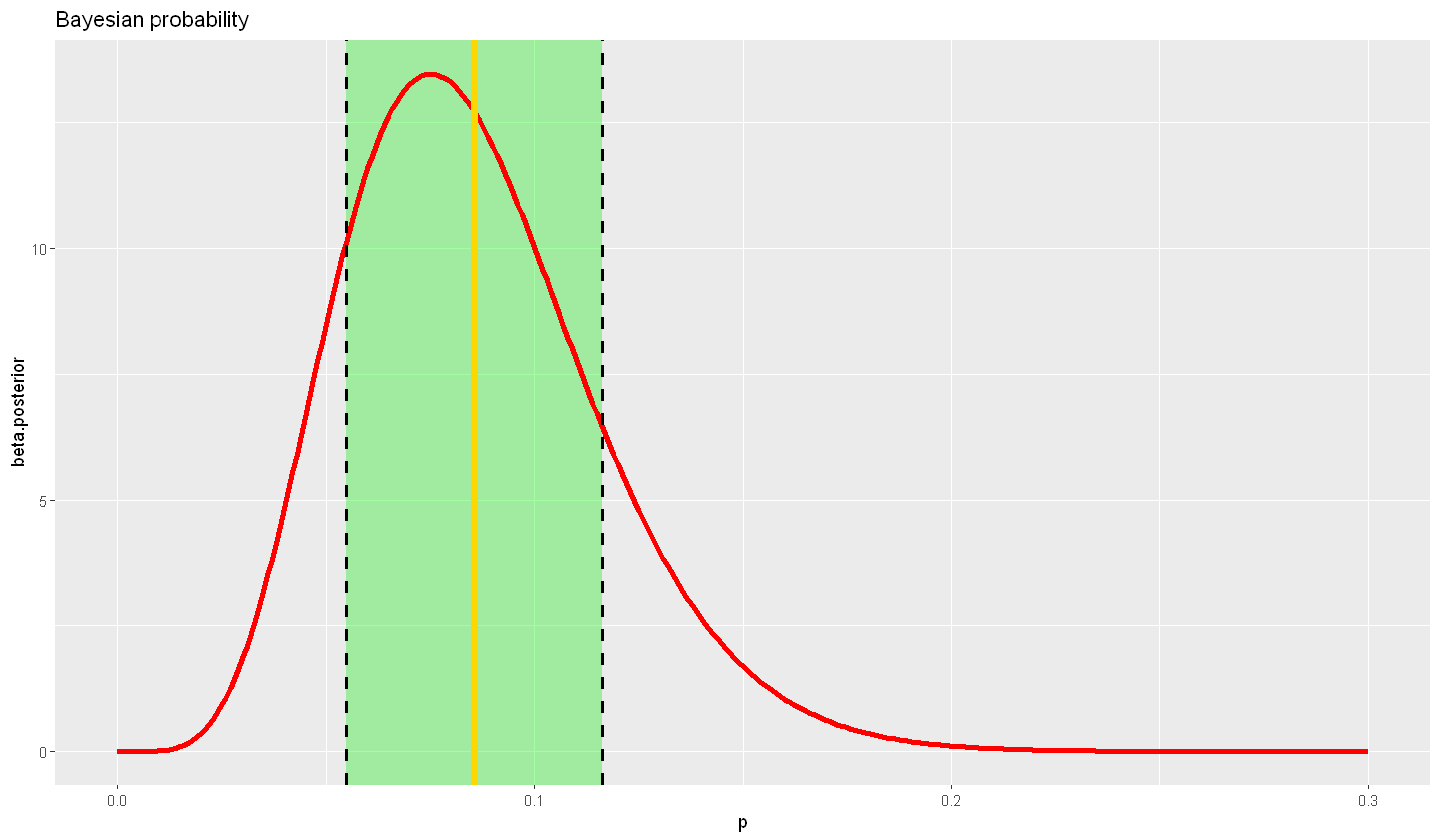

In [4]:
p<-seq(0,1,.001)

mean       <-.15
std        <-.14
sample_size<-mean*(1-mean)/std^2

likelihood<-dbinom(x=y, size=n, prob=p)

alpha.prior<-mean*sample_size
beta.prior <-(1-mean)*sample_size

prior<-dbeta(p, alpha.prior, beta.prior)

# rule of conjugate priors
alpha.post<-alpha.prior+y
beta.post <-beta.prior-y+n
beta.posterior<-dbeta(p, alpha.post, beta.post)

mean.post    <-(alpha.post)/(alpha.post+beta.post)
variance.post<-alpha.post*beta.post/((alpha.post+beta.post)^2 *(alpha.post+beta.post+1))

options(repr.plot.width = 12, repr.plot.height = 7)

data = data.frame(p,prior,beta.posterior)

p <- ggplot(data=data)
p <- p + geom_rect(aes(xmin=mean.post-sqrt(variance.post), xmax=mean.post+sqrt(variance.post),ymin=-Inf,ymax=Inf), fill='forestgreen', alpha= 0.003)
p <- p + geom_line(aes(p, beta.posterior),  color="red",   size=1.5)
#p <- p + geom_line(aes(p, prior),           color="blue",  size=1.5)
p <- p + geom_vline(xintercept = mean.post, color="gold", size=2)
p <- p + geom_vline(xintercept = mean.post-sqrt(variance.post), linetype = "dashed", color="black", size=1)
p <- p + geom_vline(xintercept = mean.post+sqrt(variance.post), linetype = "dashed", color="black", size=1)
p <- p + ylim(0,NA) + xlim(0,.3)
p <- p + labs(x        = "p",
              #y        = "PDF",
              title    = "Bayesian probability")
p

In [5]:
cat("Mean:\n", mean.post, "\n\nVariance:\n", variance.post)

Mean:
 0.08558685 

Variance:
 0.0009485685

### Exercise 1d - Hypothesis Test (Bayesian approach)<a class="anchor" id="ex1d"></a>

We want to test if the probability of failing to the detect the desease in ill patients is greater or equal than a value:

$$H_0: p<.15 \quad\quad H_1: p\geq .15 $$

with $\alpha = .05$

In [6]:
pv.b <- pbeta(p.old, alpha.post, beta.post, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is less than alpha. We reject H0 at this level of significance.")

The p value is:  0.03226834  which is less than alpha. We reject H0 at this level of significance.

In [7]:
cutoff.b <- qbeta(.05, alpha.post, beta.post, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

The cutoff value is in this case:  0.1414278 .

Warning message:
"Removed 850 rows containing missing values (position_stack)."
Warning message:
"Removed 700 row(s) containing missing values (geom_path)."


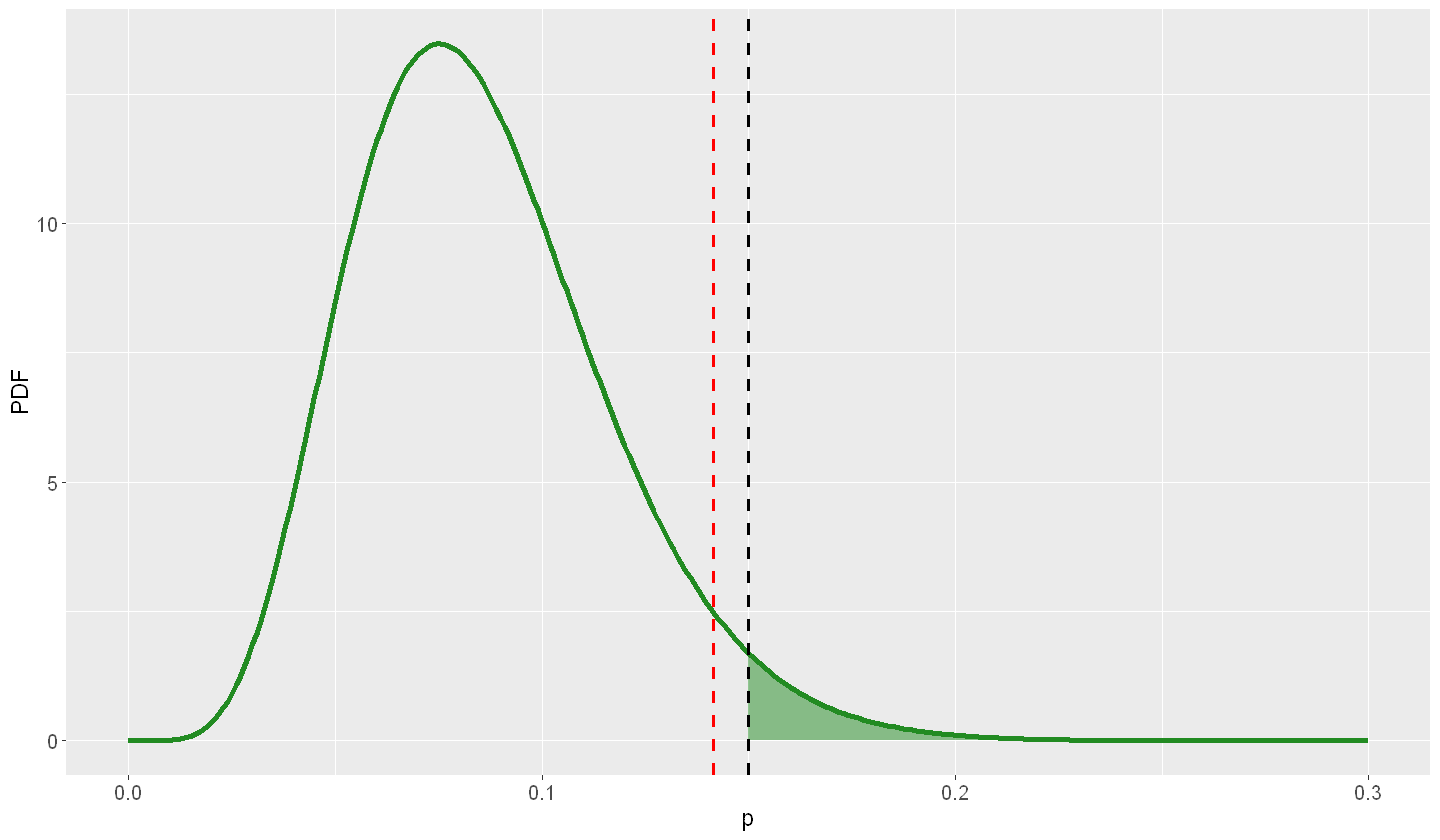

In [8]:
p <- ggplot(data, aes(x = p, y = beta.posterior))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.15, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.15, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

### Exercise 1e - Hypothesis Test (Frequentist approach)<a class="anchor" id="ex1e"></a>

In [9]:
binom.test(y, n, p = p.old, alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 6, number of trials = 75, p-value = 0.05435
alternative hypothesis: true probability of success is less than 0.15
95 percent confidence interval:
 0.0000000 0.1517971
sample estimates:
probability of success 
                  0.08 


In [10]:
pv.f <- pbinom(y, n, prob = p.old, lower.tail = TRUE)
cat("The p value is: ", pv.f, " which is greater than alpha. We accept H0 at this level of significance.")

The p value is:  0.0543533  which is greater than alpha. We accept H0 at this level of significance.

In [11]:
cutoff.f <- qbinom(p = .05, size = n, prob=p.old, lower.tail = TRUE)
cat("The cutoff value is in this case: ", cutoff.f, ".")

The cutoff value is in this case:  6 .

## Exercise 2 - Deaths by horse kick among the Prussian army <a class="anchor" id="ex2"></a>

In [12]:
y <-c(0,   1, 2,3, 4)
n1<-c(109,65,22,3, 1)
n2<-c(144,91,32,11,2)

### Exercise 2a - Death rate's distribution (Uniform Prior)<a class="anchor" id="ex2a"></a>


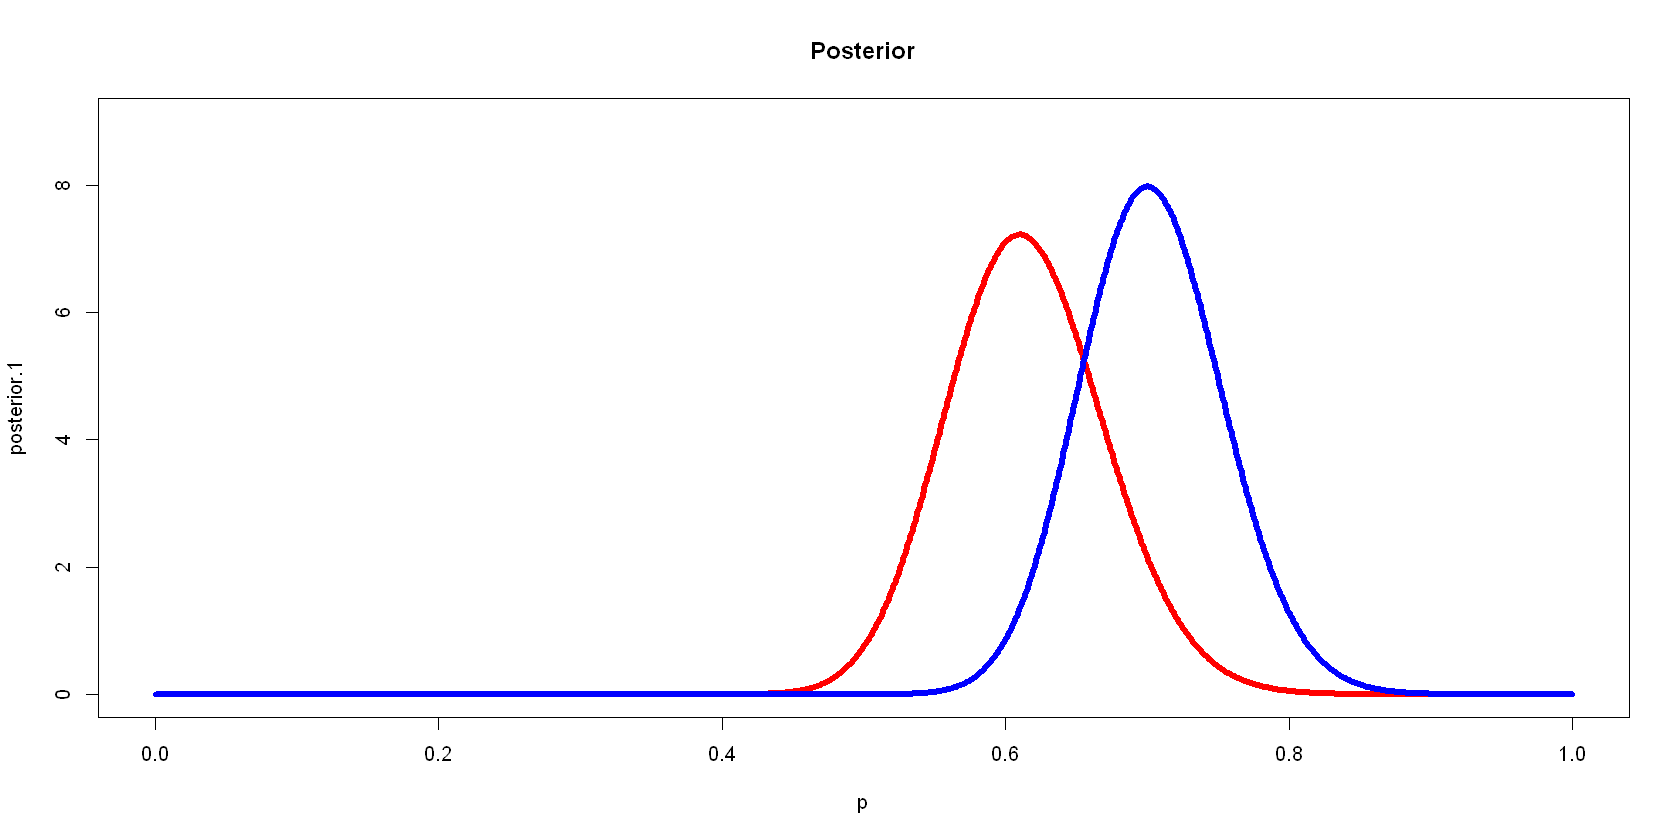

In [13]:
p<-seq(0,1,.001)
n<-length(n1)
prior<-rep(1, length(p))

alpha.1<-sum(n1*y)+1
lambda.1<-sum(n1)
posterior.1<-dgamma(x=p, shape=alpha.1, rate=lambda.1)

alpha.2<-sum(n2*y)+1
lambda.2<-sum(n2)
posterior.2<-dgamma(x=p, shape=alpha.2, rate=lambda.2)

options(repr.plot.width = 14, repr.plot.height = 7)
plot( p,posterior.1, type="l", main="Posterior", lwd=5, col='red', ylim=c(0,9) )
lines(p,posterior.2, type="l", main="Prior",     lwd=5, col='blue')


In [14]:
post<-function(p, alpha, lambda){
    return(dgamma(x=p, shape=alpha, rate=lambda))
}

Ex<-function(p, alpha, lambda){
    return(p*dgamma(x=p, shape=alpha, rate=lambda))
}

Ex2<-function(p, alpha, lambda){
    return(p*p*dgamma(x=p, shape=alpha, rate=lambda))
}

In [15]:
normalization.1<-integrate(post, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
posterior.1<-post(p, alpha=alpha.1, lambda=lambda.1)/(normalization.1)
mean.1<-integrate(Ex, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
var.1<-integrate(Ex2, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value-mean.1^2
median.1<-qgamma(.5, shape=alpha.1, rate=lambda.1)

cat("-----------Observation 1-----------\n\n")
cat("Mean: :\t",   round(mean.1,   5), 
    "\nVar:\t",    round(var.1,    5),
    "\nMedian:\t", round(median.1, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.1,lambda.1), ", ", qgamma(.975,alpha.1,lambda.1), "]")


normalization.2<-integrate(post, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
posterior.2<-post(p, alpha=alpha.2, lambda=lambda.2)/(normalization.2)
mean.2<-integrate(Ex, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
var.2<-integrate(Ex2, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value-mean.2^2
median.2<-qgamma(.5, shape=alpha.2, rate=lambda.2)

cat("\n\n-----------Observation 2-----------\n\n")
cat("Mean: :\t",   round(mean.2,   5), 
    "\nVar:\t",    round(var.2,    5),
    "\nMedian:\t", round(median.2, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.2,lambda.2), ", ", qgamma(.975,alpha.2,lambda.2), "]")


-----------Observation 1-----------

Mean: :	 0.615 
Var:	 0.00308 
Median:	 0.61333
95% CI for Uniform Prior:	 [ 0.5111251 ,  0.7283408 ]

-----------Observation 2-----------

Mean: :	 0.70357 
Var:	 0.00251 
Median:	 0.70238
95% CI for Uniform Prior:	 [ 0.6087487 ,  0.805157 ]

### Exercise 2b - Death rate's distribution (Jeffrey's Prior)<a class="anchor" id="ex2b"></a>


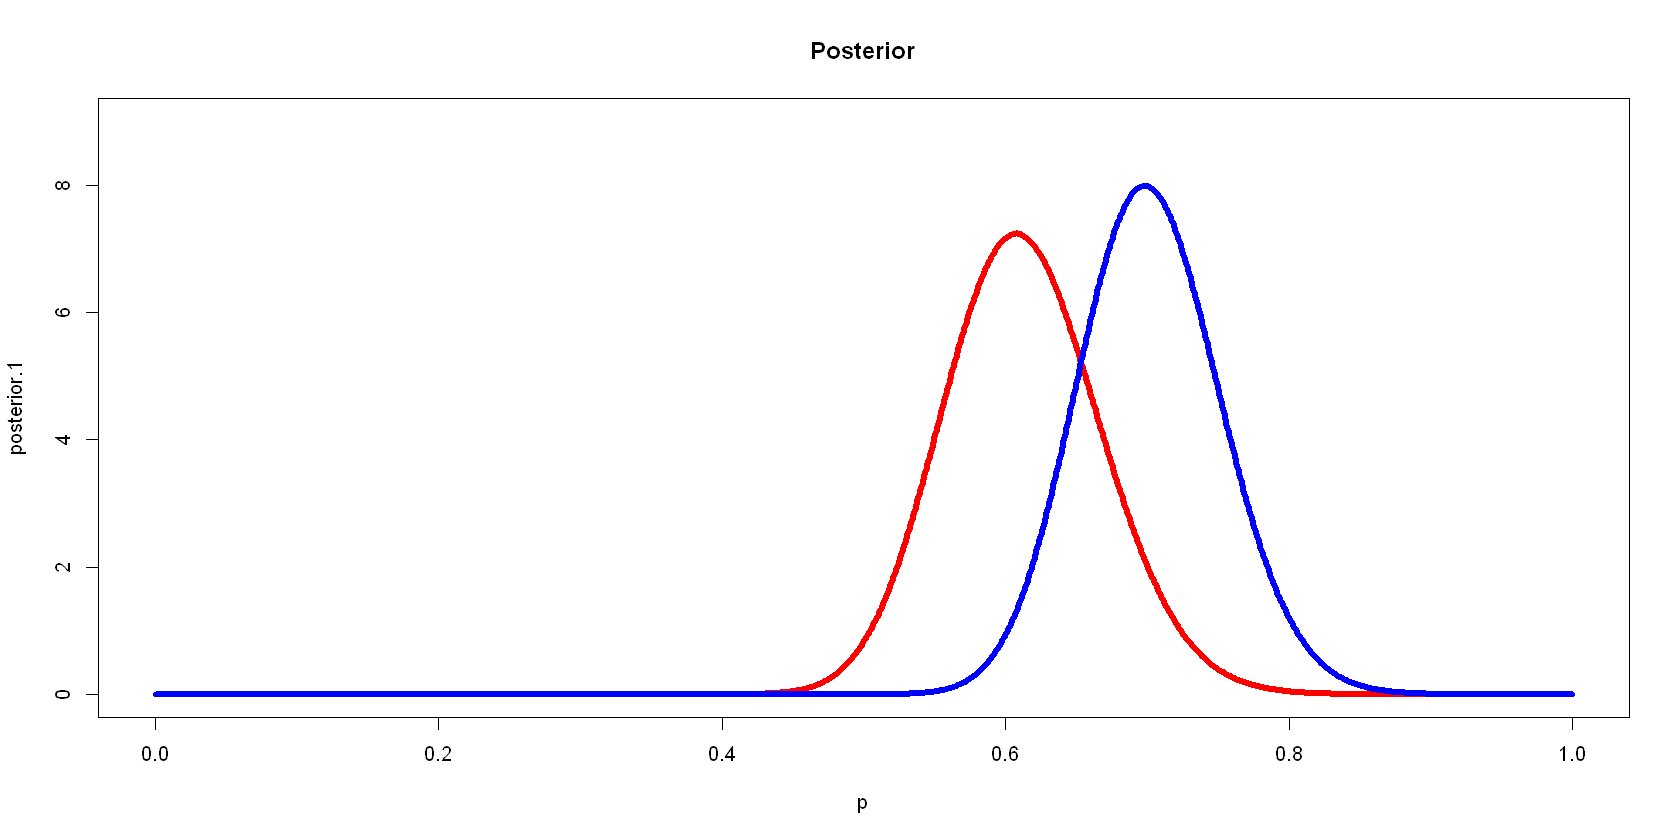

In [16]:
prior.1<-1/sqrt(p)

alpha.1<-sum(n1*y)+1/2
lambda.1 <-sum(n1)
posterior.1<-dgamma(x=p, shape=alpha.1, rate=lambda.1)

alpha.2<-sum(n2*y)+1/2
lambda.2 <-sum(n2)
posterior.2<-dgamma(x=p, shape=alpha.2, rate=lambda.2)


options(repr.plot.width = 14, repr.plot.height = 7)
plot( p,posterior.1, type="l", main="Posterior", lwd=5, col='red', ylim=c(0,9) )
lines(p,posterior.2, type="l", main="Prior",     lwd=5, col='blue')

In [17]:
normalization.1<-integrate(post, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
posterior.1<-post(p, alpha=alpha.1, lambda=lambda.1)/(normalization.1)
mean.1<-integrate(Ex, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value
var.1<-integrate(Ex2, lower=0, upper=1, alpha=alpha.1, lambda=lambda.1)$value-mean.1^2
median.1<-qgamma(.5, shape=alpha.1, rate=lambda.1)

cat("-----------Observation 1-----------\n\n")
cat("Mean: :\t",   round(mean.1,   5), 
    "\nVar:\t",    round(var.1,    5),
    "\nMedian:\t", round(median.1, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.1,lambda.1), ", ", qgamma(.975,alpha.1,lambda.1), "]")


normalization.2<-integrate(post, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
posterior.2<-post(p, alpha=alpha.2, lambda=lambda.2)/(normalization.2)
mean.2<-integrate(Ex, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value
var.2<-integrate(Ex2, lower=0, upper=1, alpha=alpha.2, lambda=lambda.2)$value-mean.2^2
median.2<-qgamma(.5, shape=alpha.2, rate=lambda.2)

cat("\n\n-----------Observation 2-----------\n\n")
cat("Mean: :\t",   round(mean.2,   5), 
    "\nVar:\t",    round(var.2,    5),
    "\nMedian:\t", round(median.2, 5))
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qgamma(.025,alpha.2,lambda.2), ", ", qgamma(.975,alpha.2,lambda.2), "]")

-----------Observation 1-----------

Mean: :	 0.6125 
Var:	 0.00306 
Median:	 0.61083
95% CI for Uniform Prior:	 [ 0.5088464 ,  0.7256196 ]

-----------Observation 2-----------

Mean: :	 0.70179 
Var:	 0.00251 
Median:	 0.7006
95% CI for Uniform Prior:	 [ 0.6070878 ,  0.8032465 ]

## Exercise 3 - Water quality of streams <a class="anchor" id="ex3"></a>

In [18]:
n <- 116
y <-  11

### Exercise 3a - Frequentist estimator <a class="anchor" id="ex3a"></a>

In [19]:
pf <- y / n
sg <- sqrt(pf*(1-pf)/n)

cat("-Unbiased estimator:\t\tpf\t=\t",        pf, 
    "\n-with standard deviation:\tsigma\t=\t",sg)

-Unbiased estimator:		pf	=	 0.09482759 
-with standard deviation:	sigma	=	 0.0272022

### Exercise 3b - Posterior distribution with beta prior <a class="anchor" id="ex3b"></a>

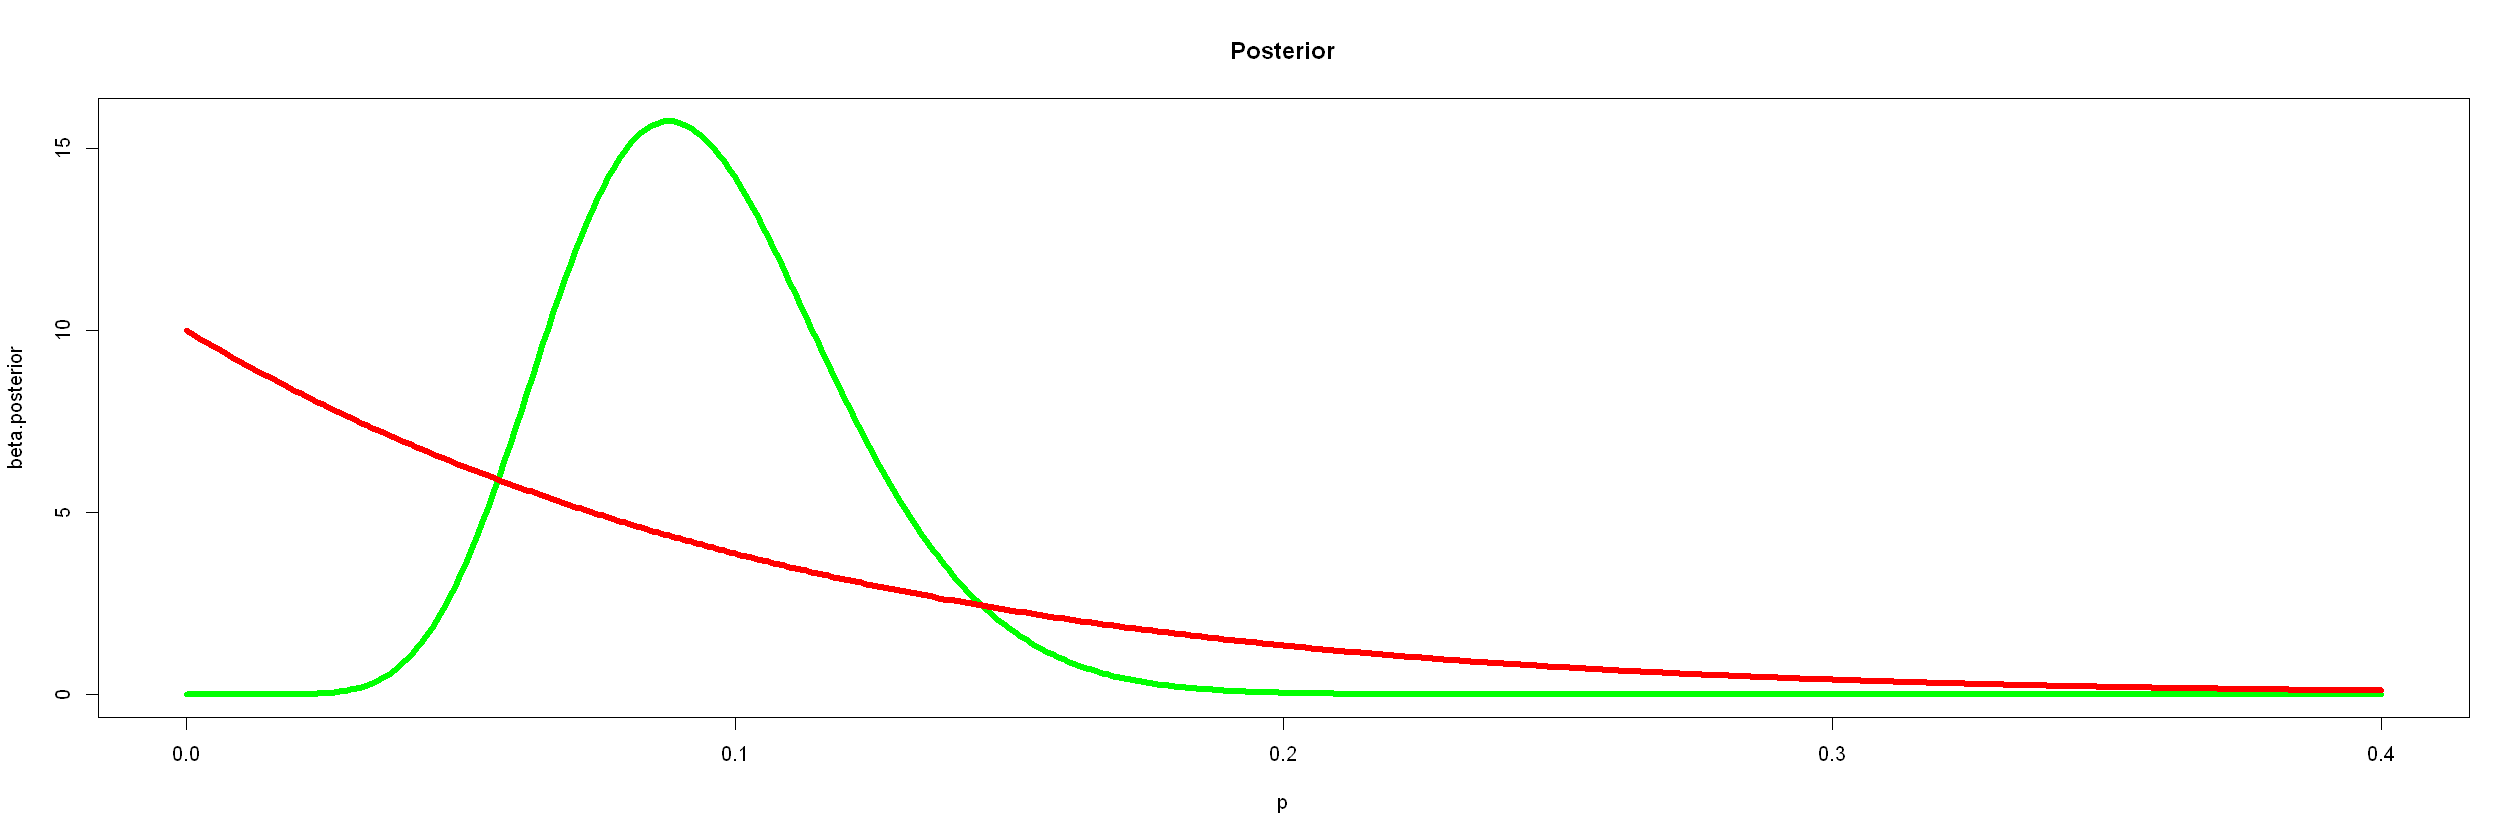

In [20]:
p<-seq(0,.4,.001)

alpha.prior<-1
beta.prior <-10

prior<-dbeta(p, alpha.prior, beta.prior)

# rule of conjugate priors
alpha.post<-alpha.prior+y
beta.post <-beta.prior-y+n
beta.posterior<-dbeta(p, alpha.post, beta.post)

alpha.old<-alpha.post
beta.old <-beta.post

options(repr.plot.width = 21, repr.plot.height = 7)
plot(p,beta.posterior, type="l", main="Posterior",     lwd=5, col='green')
lines(p,prior,          type="l", main="Uniform Prior", lwd=5, col='red'  )

### Exercise 3c - Bayesian estimator <a class="anchor" id="ex3c"></a>

In [21]:
mode     <- (alpha.post - 1)        / (alpha.post + beta.post - 2)
mean     <-  alpha.post             / (alpha.post + beta.post    )
variance <-  alpha.post * beta.post / (alpha.post + beta.post)^2 / (alpha.post + beta.post + 1)

cat("Best estimator:\t", mode,
    "\nMean:\t\t", mean, 
    "\nVar:\t\t", variance)
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qbeta(.025,alpha.post,beta.post), ", ", qbeta(.975,alpha.post,beta.post), "]")

Best estimator:	 0.088 
Mean:		 0.09448819 
Var:		 0.0006684388
95% CI for Uniform Prior:	 [ 0.05018522 ,  0.1508379 ]

### Exercise 3d - Hypotesis test <a class="anchor" id="ex3d"></a>

In [22]:
# bayesian approach

pv.b <- pbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is greater than alpha. We accept H0 at this level of significance.")

The p value is:  0.385815  which is greater than alpha. We accept H0 at this level of significance.

In [23]:
cutoff.b <- qbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

The cutoff value is in this case:  0.1287904 .

Warning message:
"Removed 200 rows containing missing values (position_stack)."
Warning message:
"Removed 100 row(s) containing missing values (geom_path)."


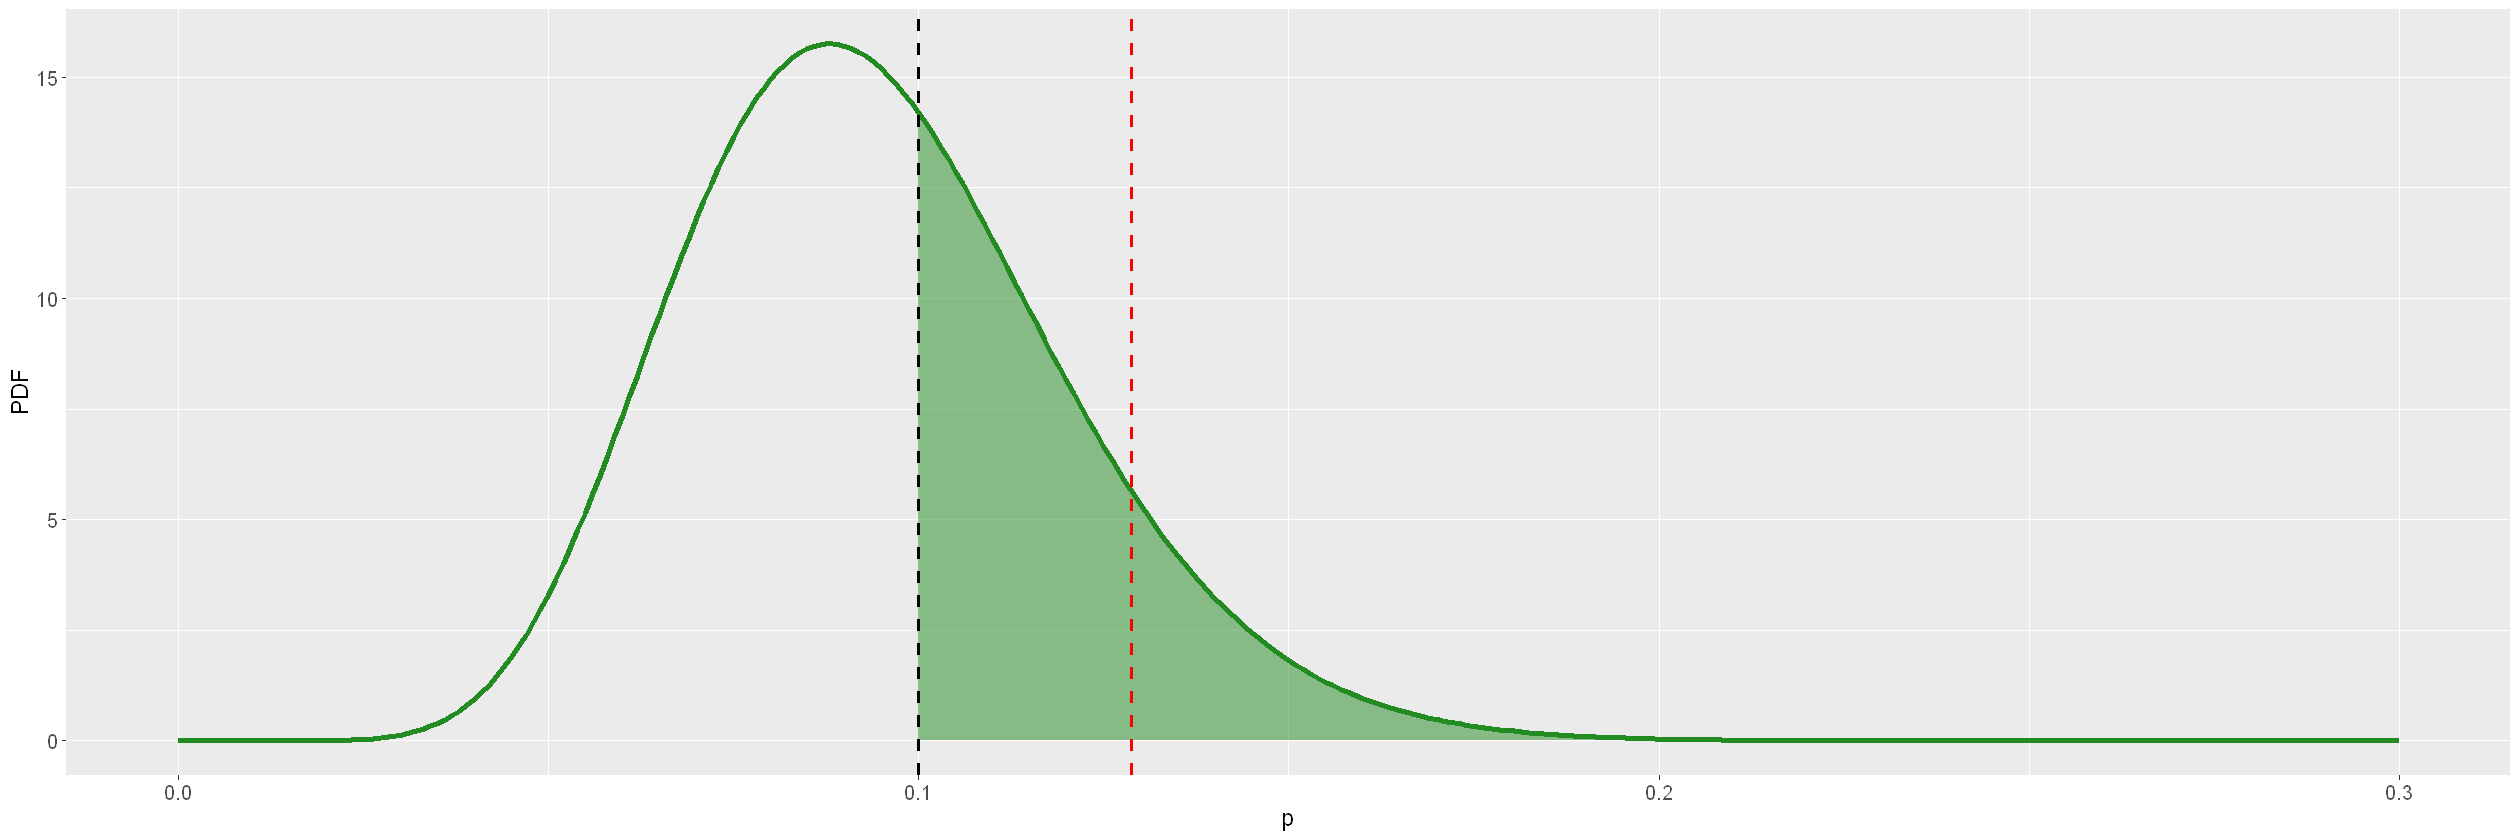

In [24]:
data = data.frame(p,prior,beta.posterior)

p <- ggplot(data, aes(x = p, y = beta.posterior))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

In [25]:
# frequentist approach

binom.test(y, n, p = .1, alternative = 'l')


	Exact binomial test

data:  y and n
number of successes = 11, number of trials = 116, p-value = 0.5043
alternative hypothesis: true probability of success is less than 0.1
95 percent confidence interval:
 0.0000000 0.1520786
sample estimates:
probability of success 
            0.09482759 


### Exercise 3e - Frequentist estimator <a class="anchor" id="ex3e"></a>

In [26]:
n <- 165
y <- 9

In [27]:
pf <- y / n
cat("Frequentist estimator:\t", pf)

Frequentist estimator:	 0.05454545

### Exercise 3f - Bayesian estimator with Beta prior and custom prior <a class="anchor" id="ex3f"></a>
and
### Exercise 3g - Mean and variance <a class="anchor" id="ex3g"></a>

Best estimator:	 0.05172414 
Mean:		 0.05681818 
Var:		 0.0003027677
95% CI for Uniform Prior:	 [ 0.02773918 ,  0.09538012 ]

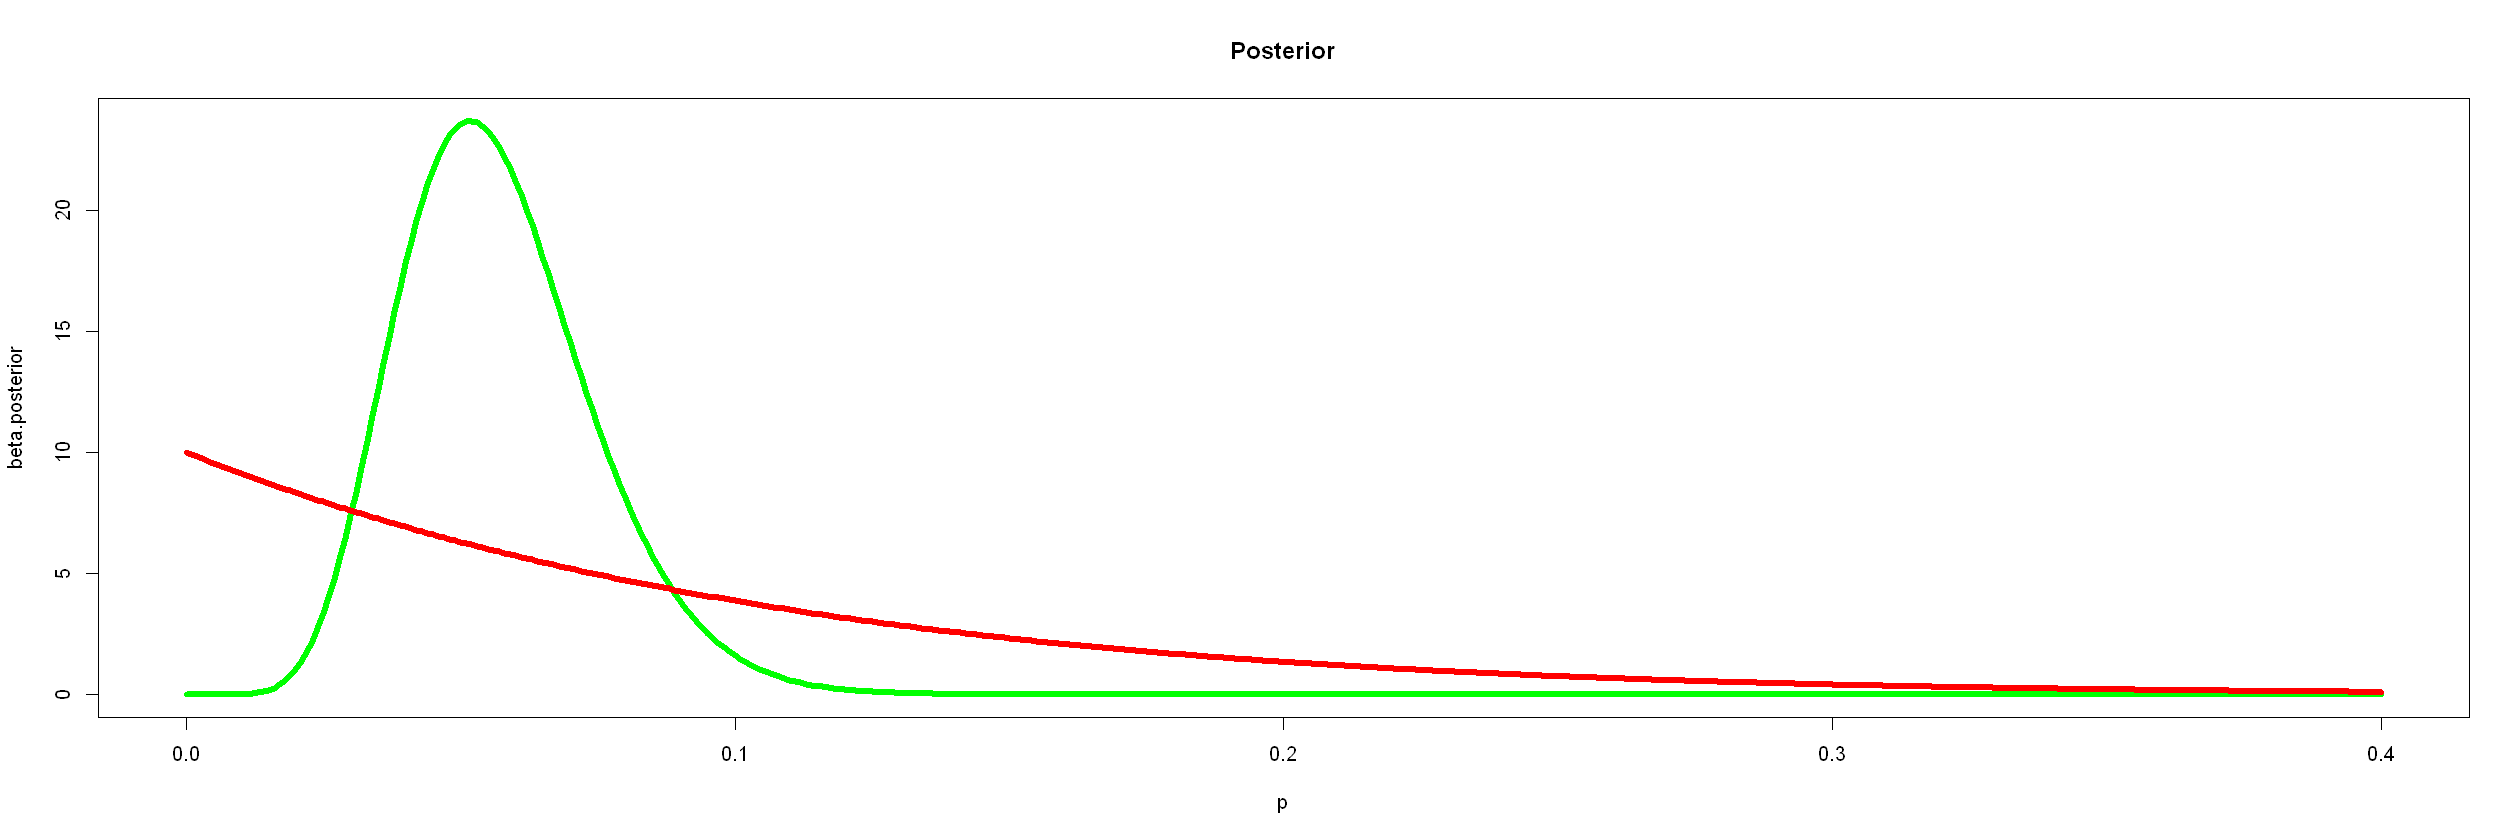

In [28]:
# beta prior

p<-seq(0,.4,.001)

alpha.prior<-1
beta.prior <-10

prior<-dbeta(p, alpha.prior, beta.prior)

# rule of conjugate priors
alpha.post<-alpha.prior+y
beta.post <-beta.prior-y+n
beta.posterior<-dbeta(p, alpha.post, beta.post)

options(repr.plot.width = 21, repr.plot.height = 7)
plot(p,beta.posterior, type="l", main="Posterior",      lwd=5, col='green')
lines(p,prior,          type="l", main="Uniform Prior", lwd=5, col='red'  )

mode <- (alpha.post - 1) / (alpha.post + beta.post - 2)
mean     <-  alpha.post             / (alpha.post + beta.post    )
variance <-  alpha.post * beta.post / (alpha.post + beta.post)^2 / (alpha.post + beta.post + 1)

cat("Best estimator:\t", mode,
    "\nMean:\t\t", mean, 
    "\nVar:\t\t", variance)
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qbeta(.025,alpha.post,beta.post), ", ", qbeta(.975,alpha.post,beta.post), "]")

Best estimator:	 0.06896552 
Mean:		 0.07191781 
Var:		 0.0002278008
95% CI for Uniform Prior:	 [ 0.04522356 ,  0.1041519 ]

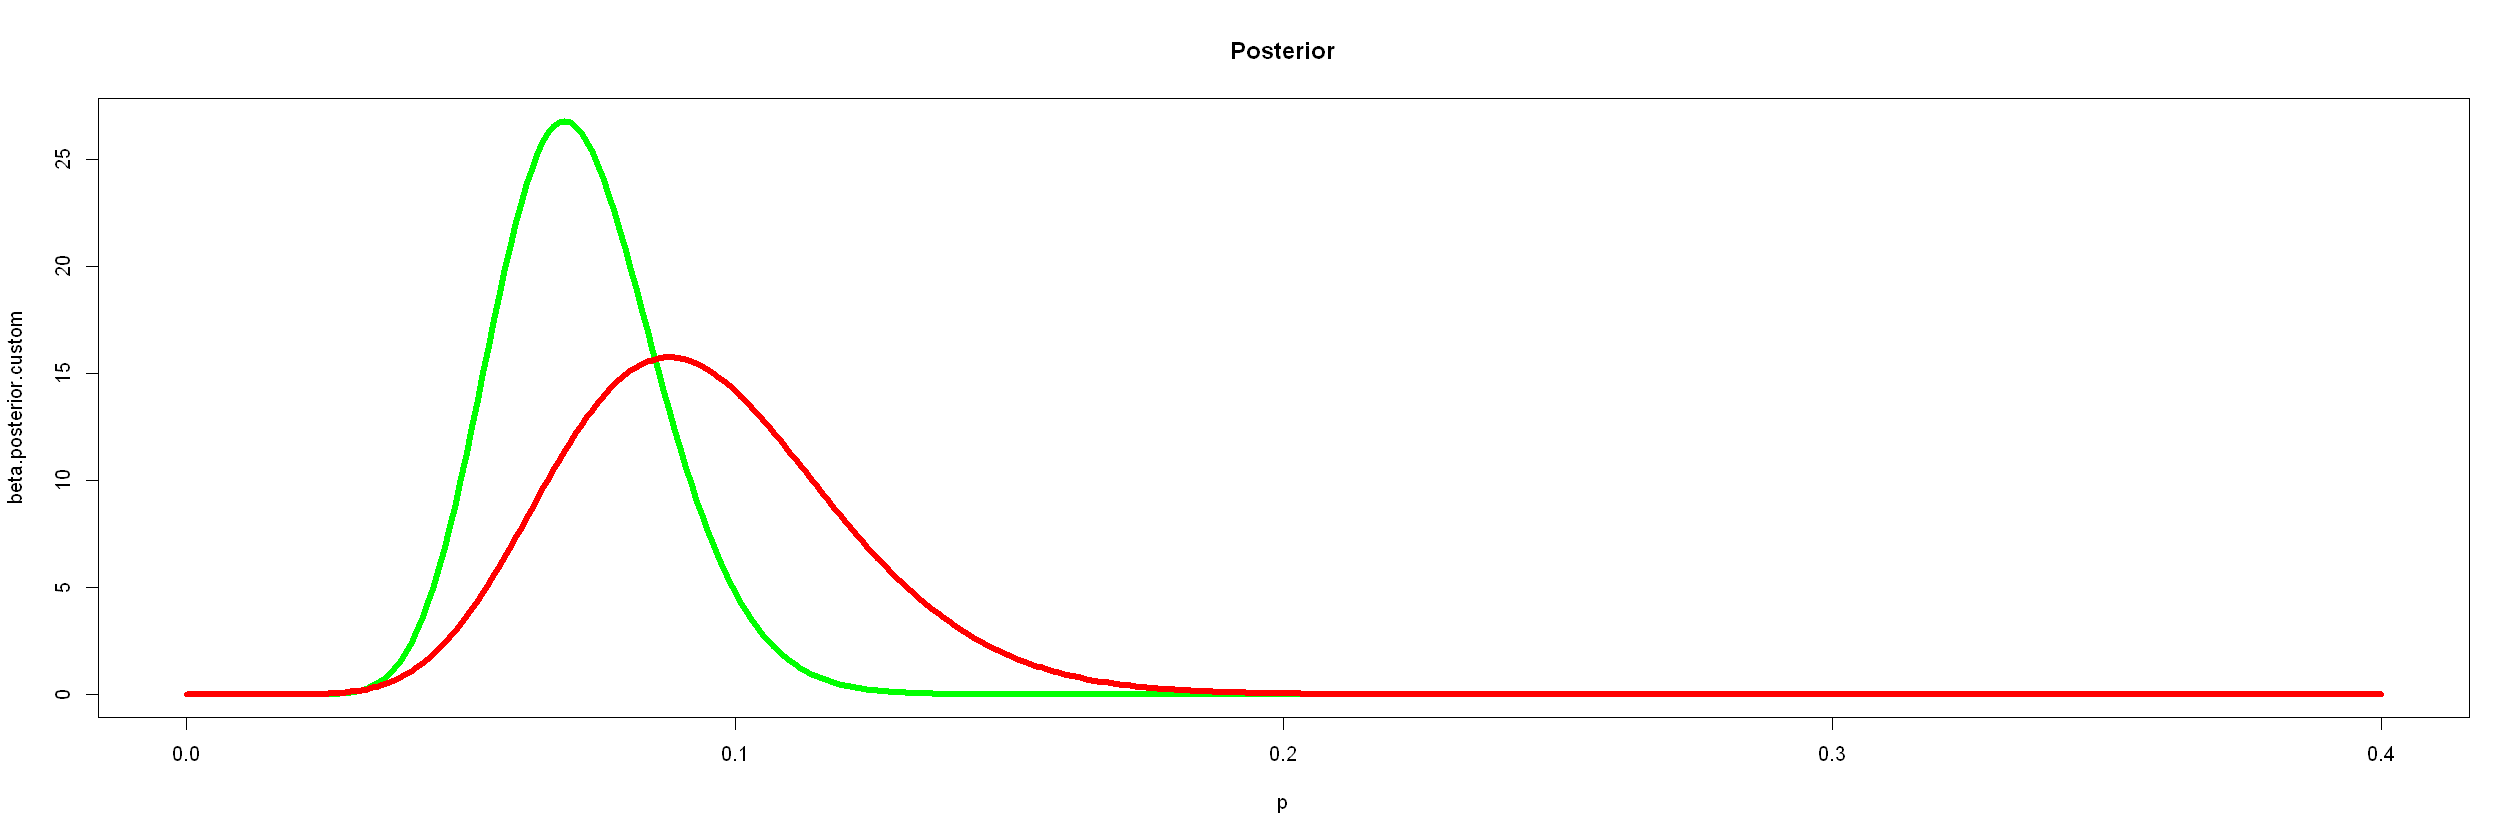

In [29]:
# custom prior

prior<-dbeta(p, alpha.old, beta.old)

# rule of conjugate priors
alpha.post.custom<-alpha.old+y
beta.post.custom <-beta.old-y+n
beta.posterior.custom<-dbeta(p, alpha.post.custom, beta.post.custom)

data.custom = data.frame(p,prior,beta.posterior.custom)

options(repr.plot.width = 21, repr.plot.height = 7)
plot(p,beta.posterior.custom, type="l", main="Posterior",      lwd=5, col='green')
lines(p,prior,          type="l", main="Uniform Prior", lwd=5, col='red'  )

mode <- (alpha.post.custom - 1) / (alpha.post.custom + beta.post.custom - 2)
mean     <-  alpha.post.custom             / (alpha.post.custom + beta.post.custom    )
variance <-  alpha.post.custom * beta.post.custom / (alpha.post.custom + beta.post.custom)^2 / (alpha.post.custom + beta.post.custom + 1)

cat("Best estimator:\t", mode,
    "\nMean:\t\t", mean, 
    "\nVar:\t\t", variance)
cat("\n")
cat("95% CI for Uniform Prior:\t [", 
    qbeta(.025,alpha.post.custom,beta.post.custom), ", ", qbeta(.975,alpha.post.custom,beta.post.custom), "]")

### Exercise 3h - Hypotesis test <a class="anchor" id="ex3h"></a>

The p value is:  0.01574077  which is less than alpha. We reject H0 at this level of significance.
The cutoff value is in this case:  0.07996788 .

Warning message:
"Removed 200 rows containing missing values (position_stack)."
Warning message:
"Removed 100 row(s) containing missing values (geom_path)."


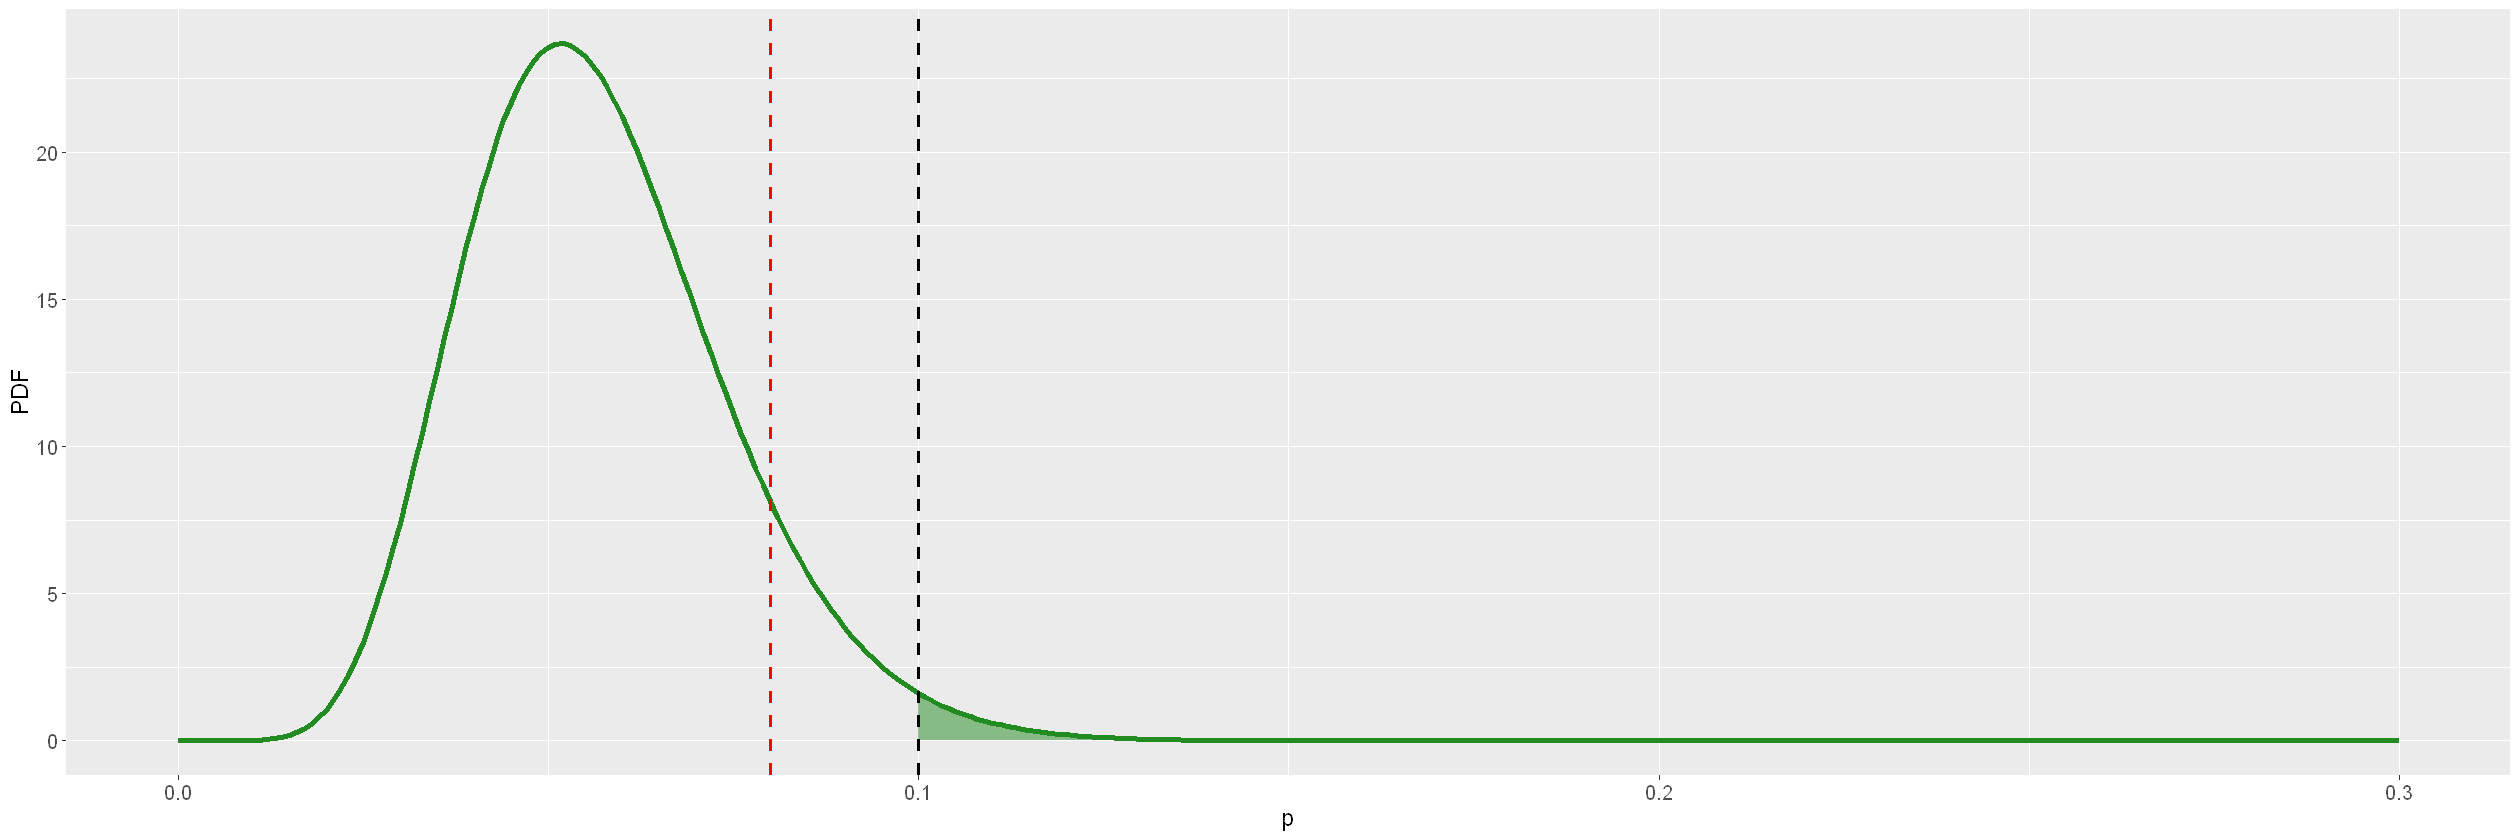

In [30]:
# bayesian approach

pv.b <- pbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is less than alpha. We reject H0 at this level of significance.")
cat("\n")
cutoff.b <- qbeta(.1, alpha.post, beta.post, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

data = data.frame(p,prior,beta.posterior)

p <- ggplot(data, aes(x = p, y = beta.posterior))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

The p value is:  0.04117008  which is less than alpha. We reject H0 at this level of significance.
The cutoff value is in this case:  0.09180464 .

Warning message:
"Removed 200 rows containing missing values (position_stack)."
Warning message:
"Removed 100 row(s) containing missing values (geom_path)."


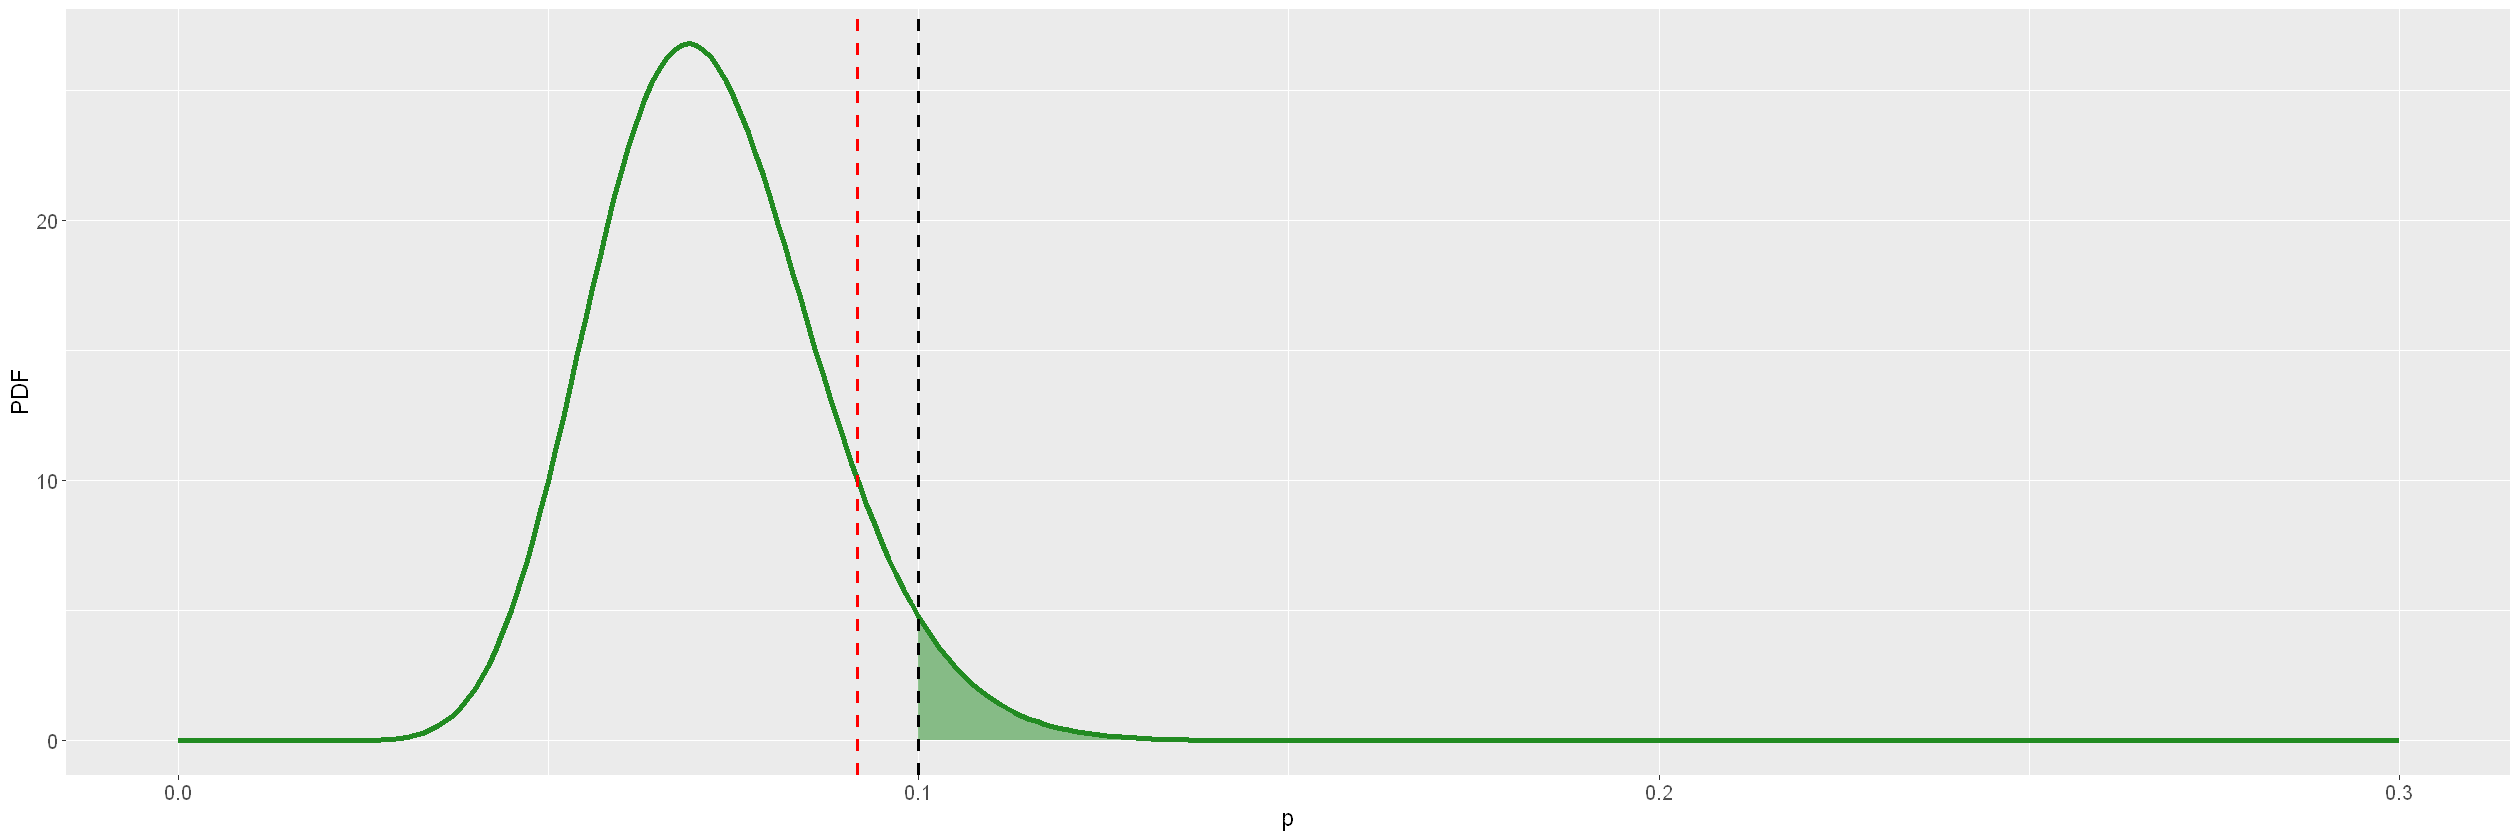

In [31]:
# bayesian approach custom function

pv.b <- pbeta(.1, alpha.post.custom, beta.post.custom, lower.tail = FALSE)
cat("The p value is: ", pv.b, " which is less than alpha. We reject H0 at this level of significance.")
cat("\n")
cutoff.b <- qbeta(.1, alpha.post.custom, beta.post.custom, lower.tail = FALSE)
cat("The cutoff value is in this case: ", cutoff.b, ".")

p <- ggplot(data, aes(x = p, y = beta.posterior.custom))
p <- p + geom_line(size = 1.5, color = 'forestgreen')
p <- p + geom_area(aes(ifelse(p>= 0.1, p, NA)), fill = 'forestgreen', alpha = 0.5)
p <- p + geom_vline(xintercept = 0.1, col = 'black', size = 1, linetype = 'dashed')
p <- p + geom_vline(xintercept = cutoff.b, col = 'red', size = 1, linetype = 'dashed')
p <- p + xlim(0, 0.3)
p <- p + ylab('PDF')
p <- p + theme(axis.title.x = element_text(size=14), axis.text.x = element_text(size=12))
p <- p + theme(axis.title.y = element_text(size=14), axis.text.y = element_text(size=12))
p

## Exercise 4 - Ex1 with MCMC with JAGS <a class="anchor" id="ex4"></a>

In [32]:
dir <- "Models_Jags"

mean       <-.15
std        <-.14
sample_size<-mean*(1-mean)/std^2

alpha.prior<-mean*sample_size
beta.prior <-(1-mean)*sample_size

In [33]:
modelString = "model {
    # data likelihood
    for(i in 1:n){
        X[i] ~ dbern(p);
    }
    
    # a beta prior for p
    p ~ dbeta(alpha, beta)

    # Predicted data , given p
    y ~ dbin(p, n_next);
}
"
writeLines ( modelString , con=paste(dir, "model_4.txt", sep="/"))

In [34]:
x <- 6
n <- 75
data_obs <- rep(c(0, 1), c(n-x, x))

data <- NULL
data$X <- data_obs
data$n <- n

data$n_next <- 10 # Predictions

data$alpha <- alpha.prior
data$beta  <- beta.prior

jm <- jags.model(file=paste(dir, "model_4.txt", sep="/"), data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 75
   Unobserved stochastic nodes: 2
   Total graph size: 81

Initializing model



In [35]:
# Update the Markov chain (Burn -in)
update(jm , 1000)
chain <- coda.samples(jm , c("p", "y"), n.iter=10000)
print(summary(chain))


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

     Mean      SD  Naive SE Time-series SE
p 0.08592 0.03108 0.0003108      0.0003108
y 0.84570 0.92821 0.0092821      0.0092821

2. Quantiles for each variable:

    2.5%     25%     50%    75% 97.5%
p 0.0356 0.06326 0.08222 0.1046 0.155
y 0.0000 0.00000 1.00000 1.0000 3.000



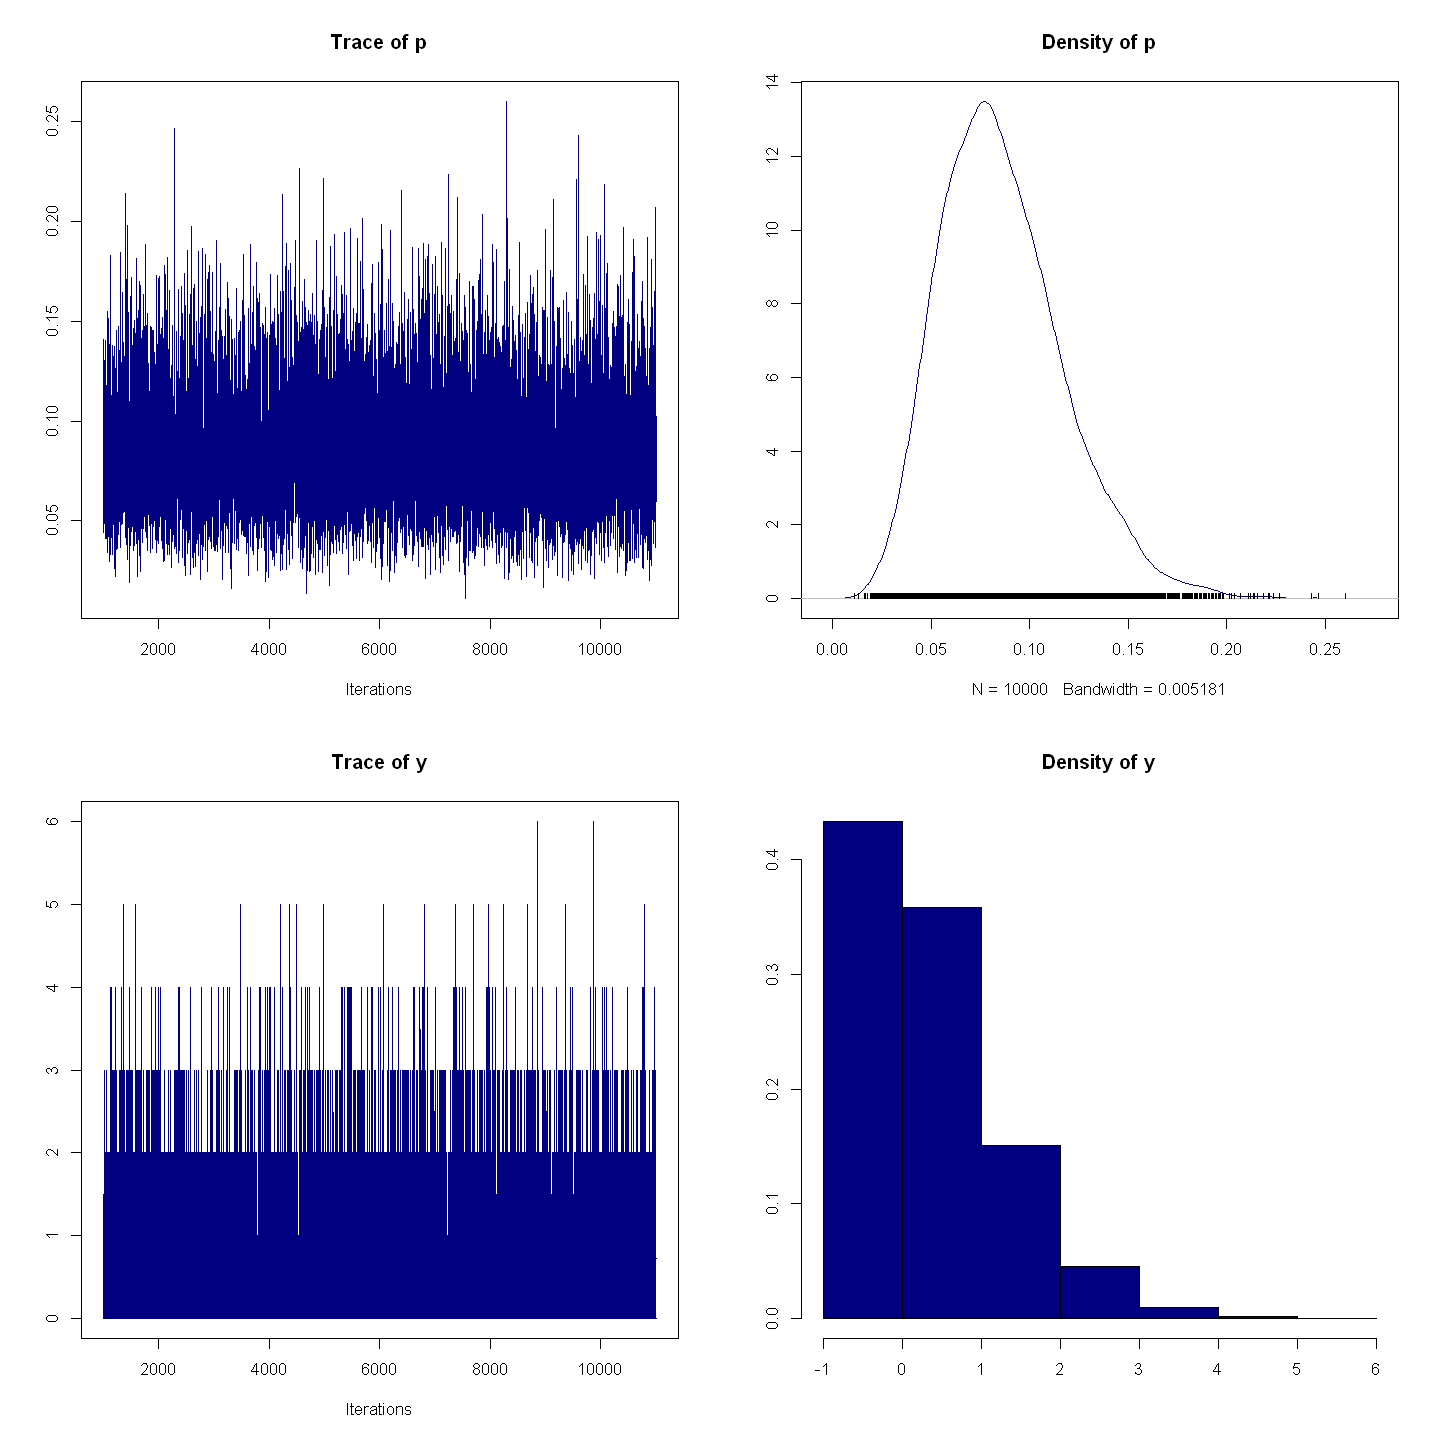

In [36]:
options(repr.plot.width = 12, repr.plot.height = 12)
plot(chain , col="navy")


 Correlation matrix: 
          p         y
p 1.0000000 0.3331138
y 0.3331138 1.0000000


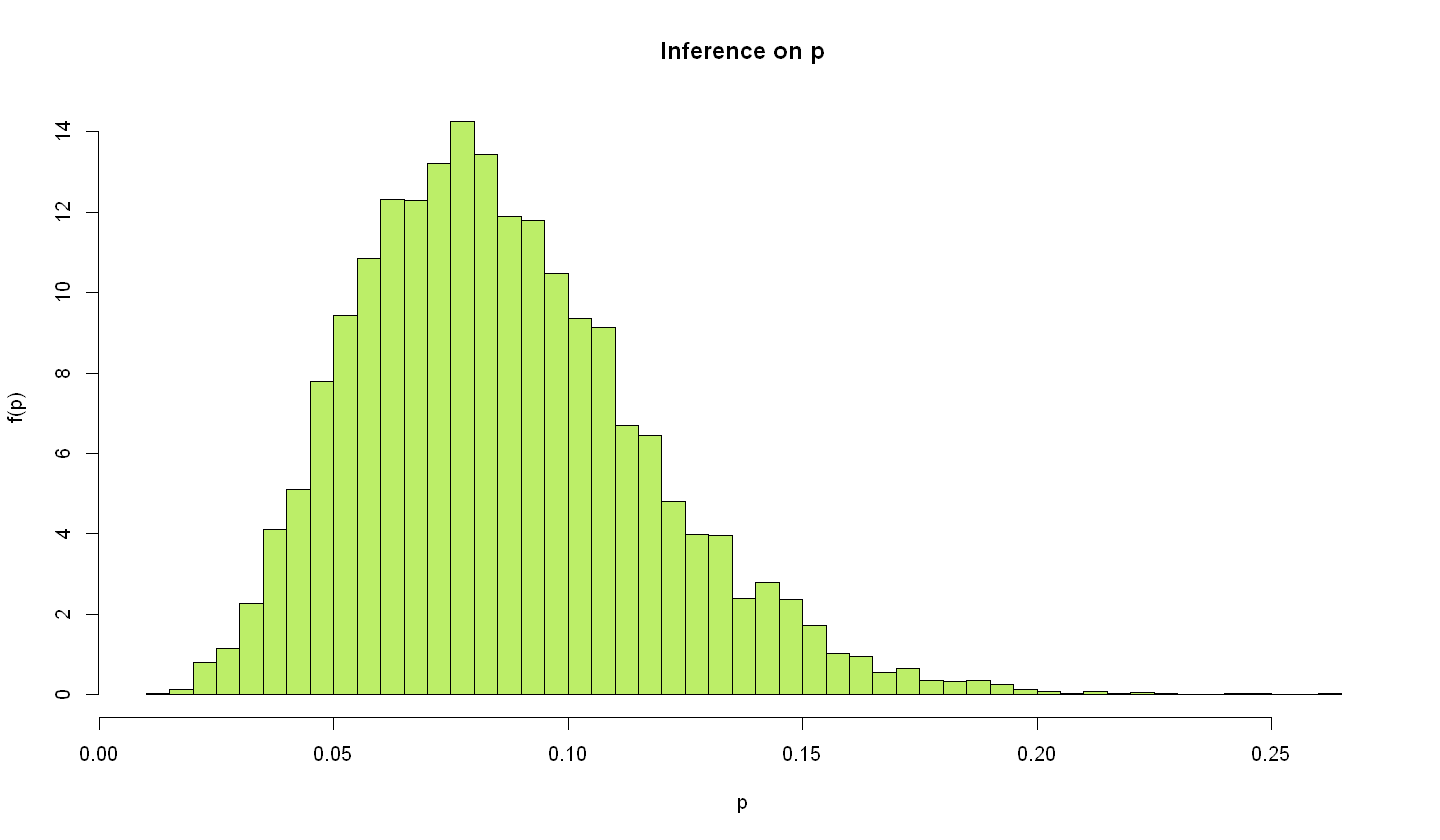

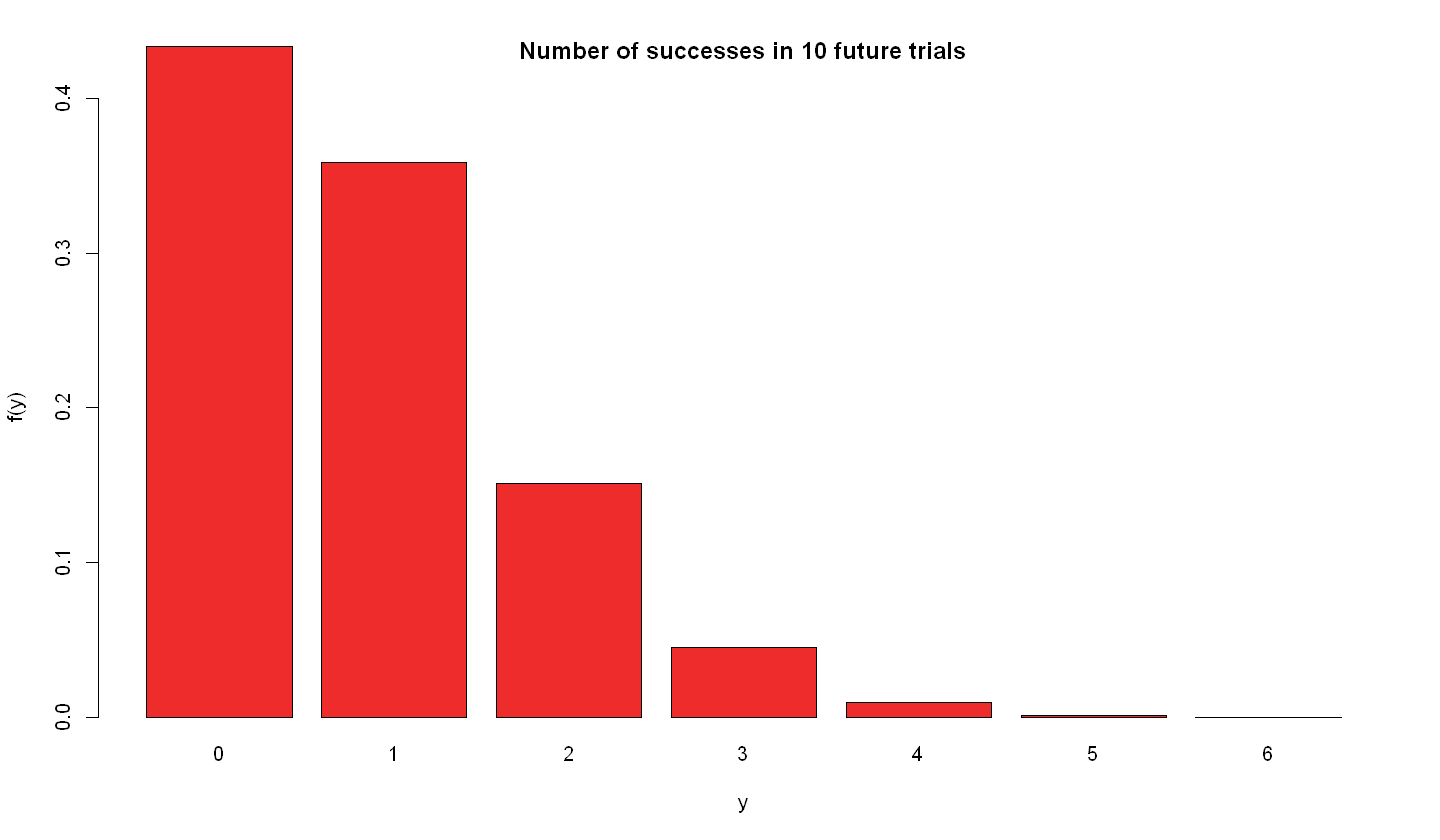

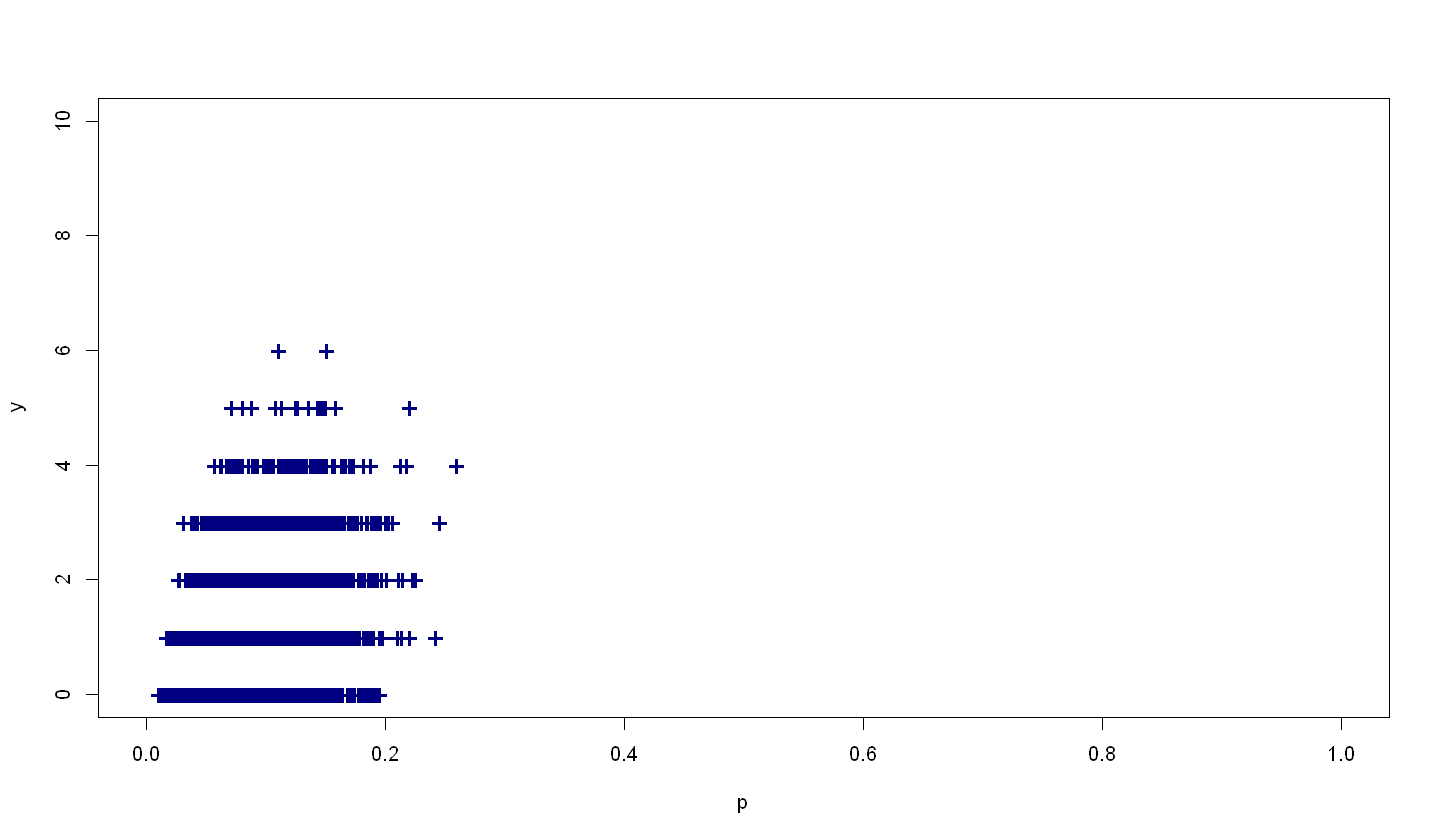

In [37]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))
#
# p inference result
#
hist(chain.df$p, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='p', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data$n_next))
#
# Correlation between p and predicted variable
#
plot(chain.df$p, chain.df$y, xlab='p', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))

## Exercise 5 - Ex2 with MCMC with JAGS <a class="anchor" id="ex5"></a>

In [38]:
y <-c(0,   1, 2,3, 4)
n1<-c(109,65,22,3, 1)
n2<-c(144,91,32,11,2)

n<-length(n1)

alpha.1<-sum(n1*y)+1
lambda.1<-sum(n1)

alpha.2<-sum(n2*y)+1
lambda.2<-sum(n2)

#### Uniform prior

In [39]:
modelString = "
    model{
        # data likelihood 
        for (i in 1:length(X)) {
            X[i] ~ dpois(lambda);
        }
        # uniform prior for lambda
        lambda ~ dunif(min.prior, max.prior)

        # Predicted data , given p
        y ~ dpois(lambda);
    }
"

writeLines ( modelString , con=paste(dir, "model_5.txt", sep="/"))

In [40]:
data_obs1 <- rep(y, n1)

data1 <- NULL
data1$X <- data_obs1
data1$min.prior <- 0
data1$max.prior <- 10


data_obs2 <- rep(y, n2)

data2 <- NULL
data2$X <- data_obs2
data2$min.prior <- 0
data2$max.prior <- 10


jm1 <- jags.model(file=paste(dir, "model_5.txt", sep="/"), data1)
jm2 <- jags.model(file=paste(dir, "model_5.txt", sep="/"), data2)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 204

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 284

Initializing model



In [41]:
# Update the Markov chain (Burn -in)
update(jm1 , 1000)
chain1 <- coda.samples(jm1 , c("lambda", "y"), n.iter=10000)
print(summary(chain1))


update(jm2 , 1000)
chain2 <- coda.samples(jm2 , c("lambda", "y"), n.iter=10000)
print(summary(chain2))


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean     SD Naive SE Time-series SE
lambda 0.6140 0.0549 0.000549      0.0007177
y      0.6087 0.7965 0.007965      0.0079652

2. Quantiles for each variable:

         2.5%    25%   50%  75%  97.5%
lambda 0.5118 0.5757 0.613 0.65 0.7255
y      0.0000 0.0000 0.000 1.00 3.0000


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.7032 0.05001 0.0005001      0.0006251
y      0.6916 0.82447 0.0082447      0.0083774

2. Quantiles for each variable:

         2.5%    25%   50%    75%  97.5%
lambda 0.6085 0.6697 0.702 0.7354 0.8051
y      0.0000 0.0000 1.000 1.0000 3.0000



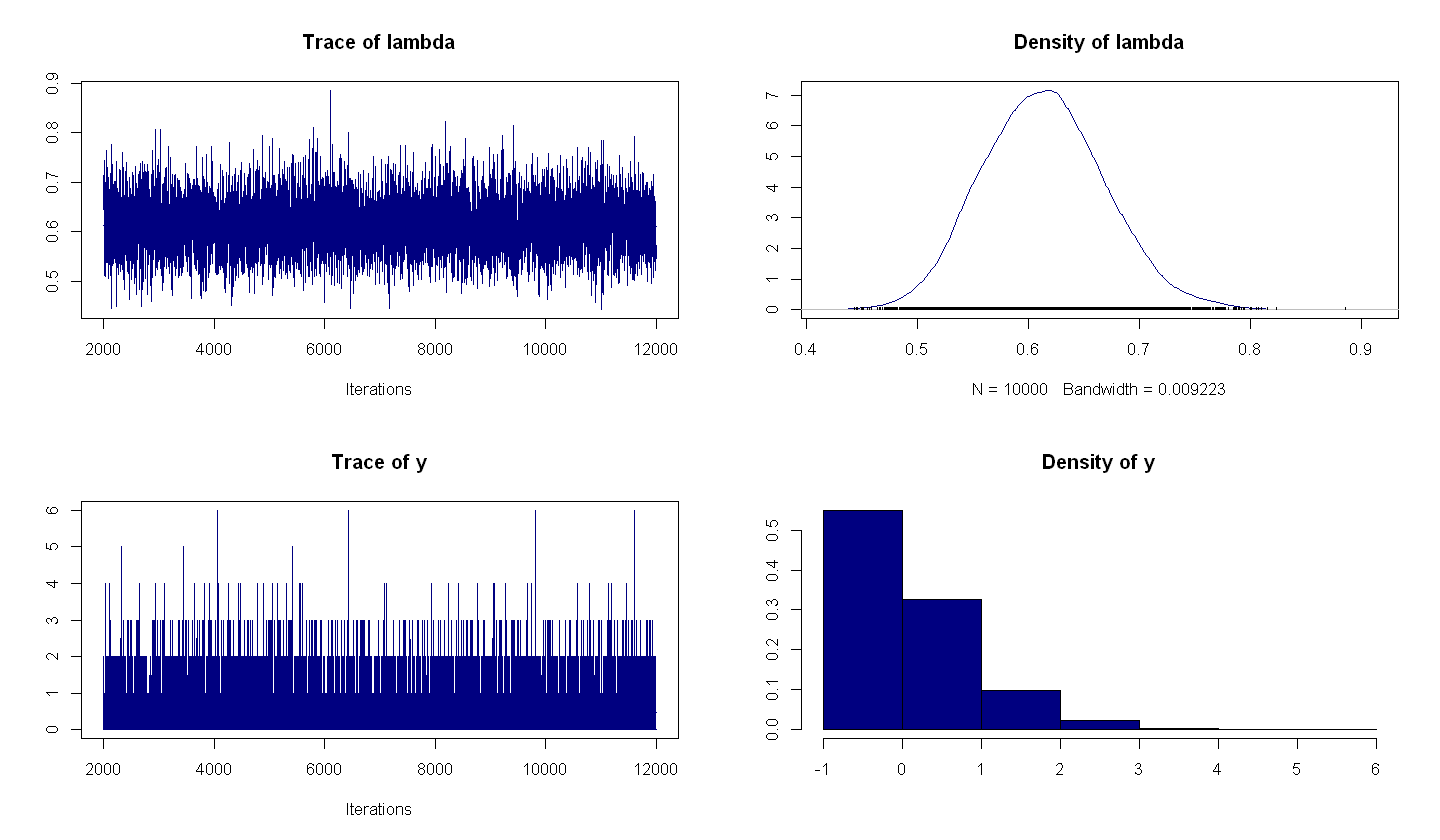

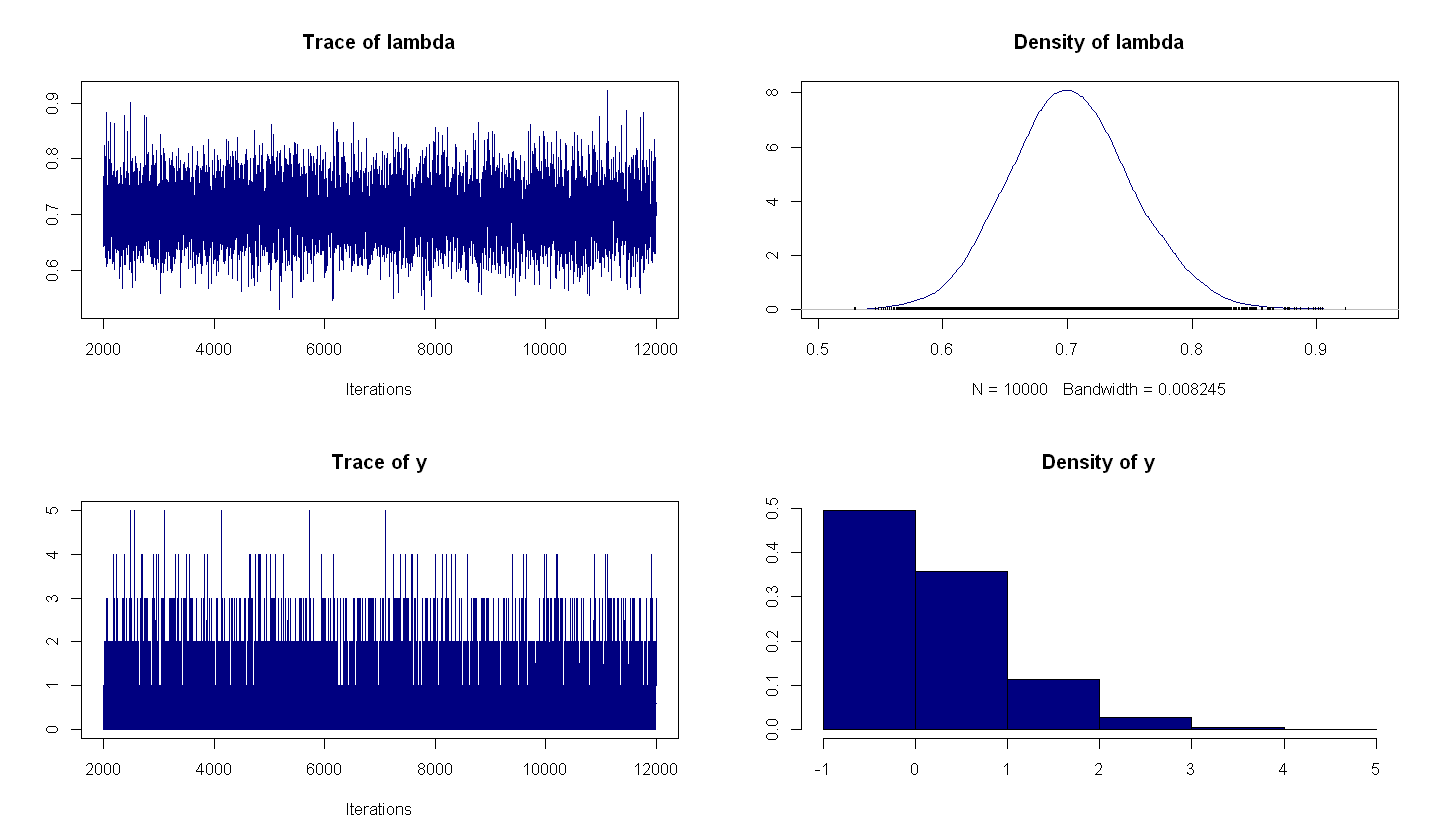

In [42]:
options(repr.plot.width = 12, repr.plot.height = 7)
plot(chain1 , col="navy")
plot(chain2 , col="navy")


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.07990678
y      0.07990678 1.00000000


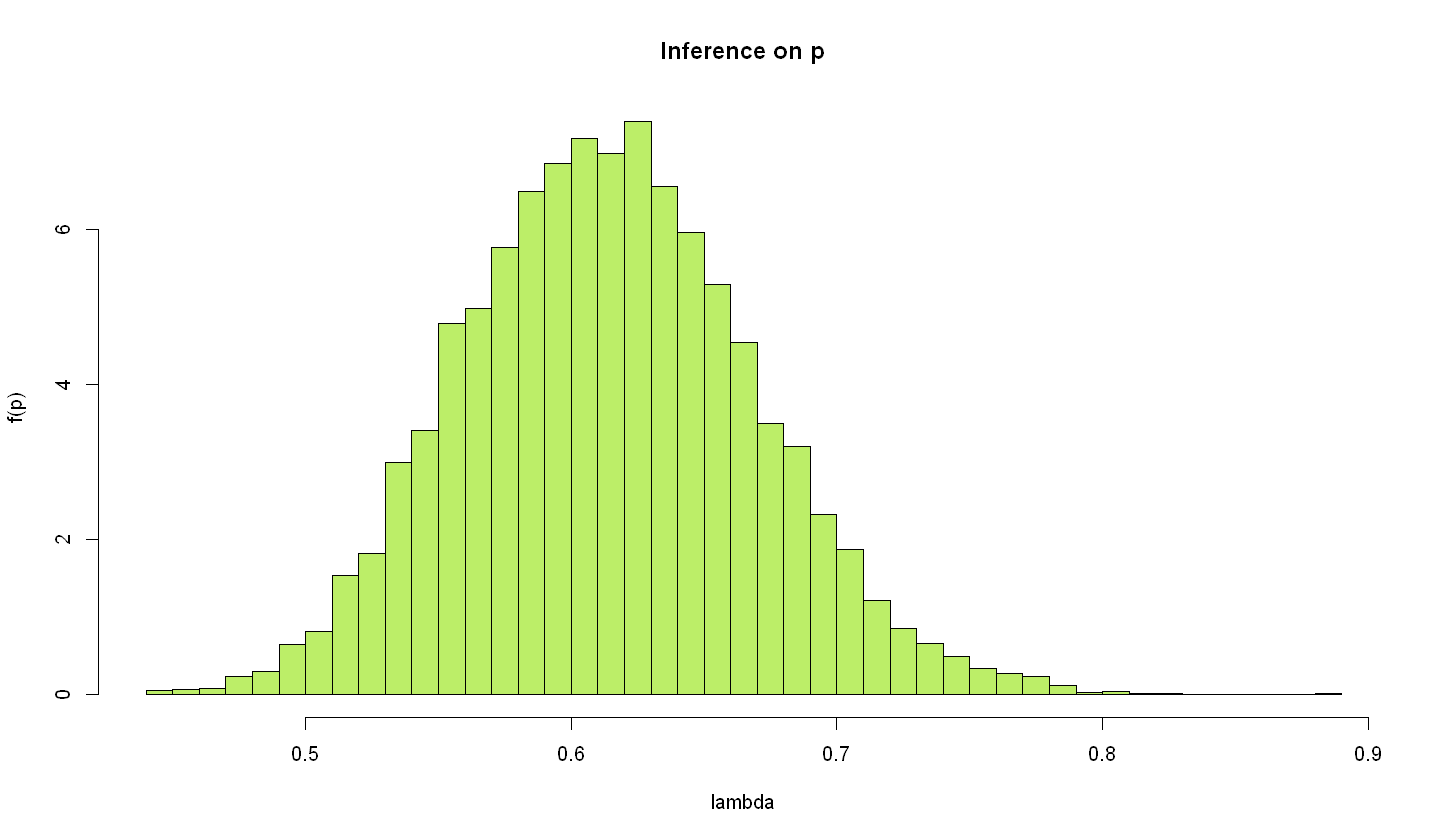

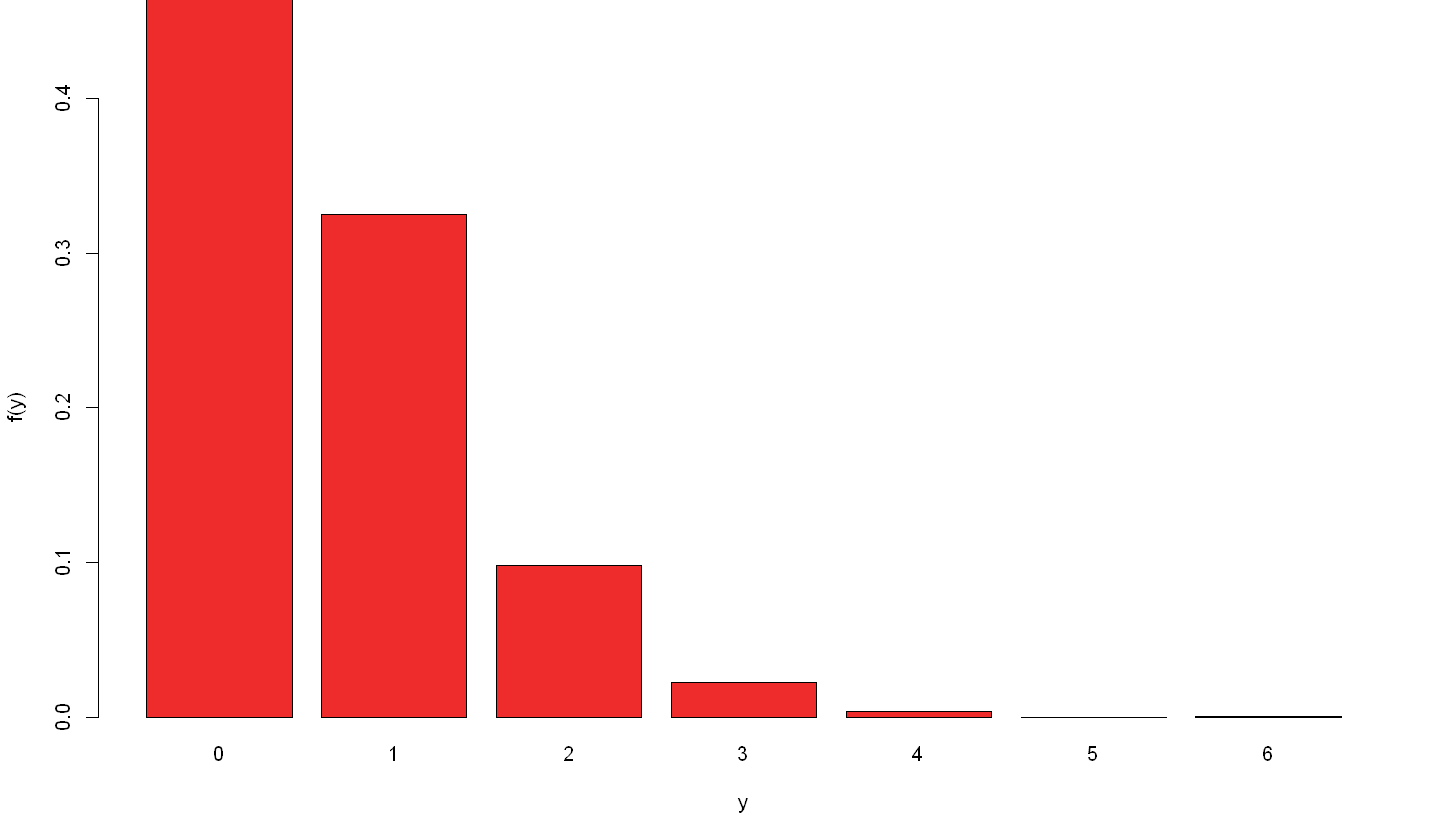

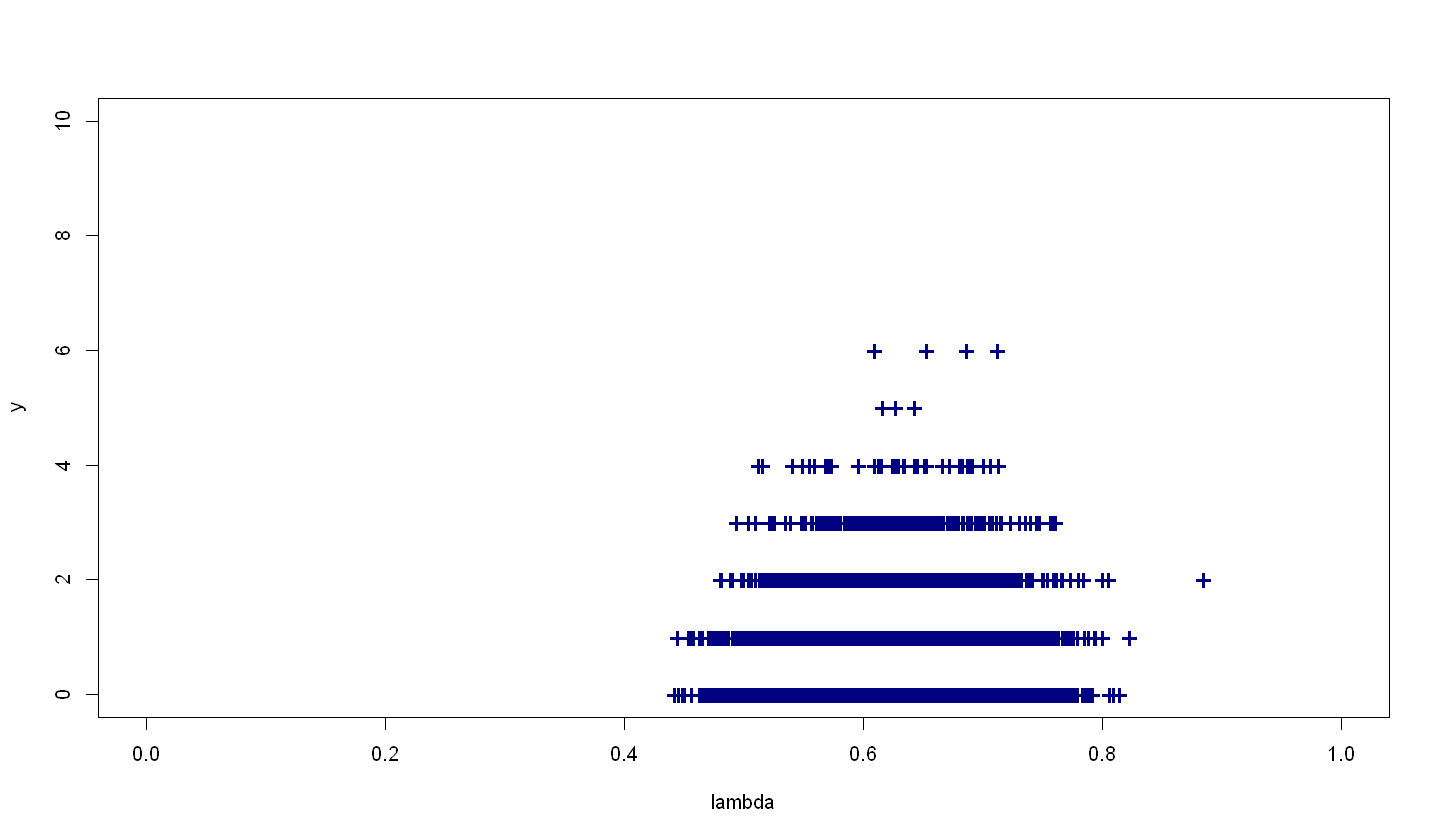

In [43]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain1.df <- as.data.frame( as.mcmc(chain1) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain1.df))
#
# p inference result
#
hist(chain1.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain1.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data1$n_next))
#
# Correlation between p and predicted variable
#
plot(chain1.df$lambda, chain1.df$y, xlab='lambda', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.06603957
y      0.06603957 1.00000000


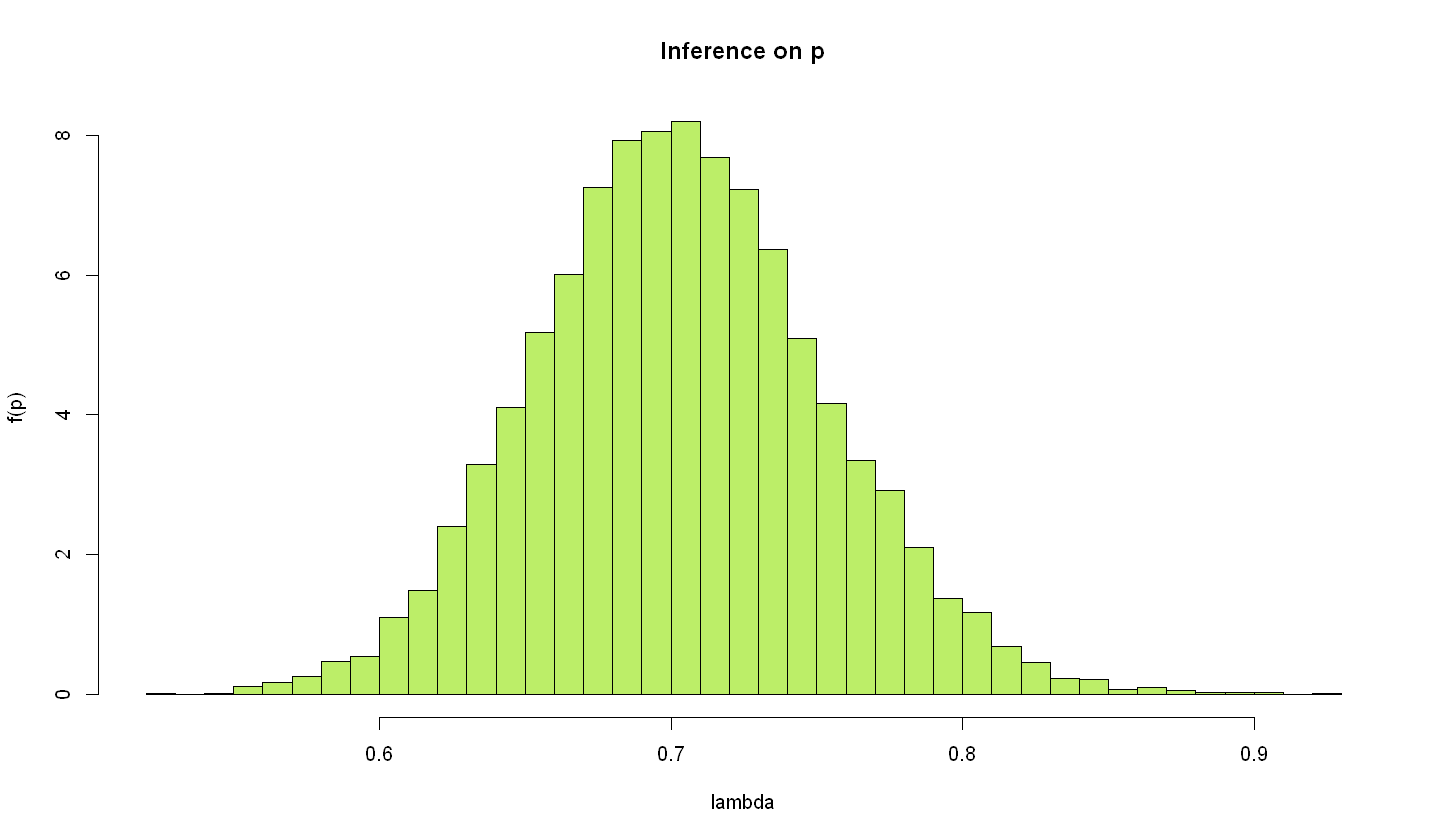

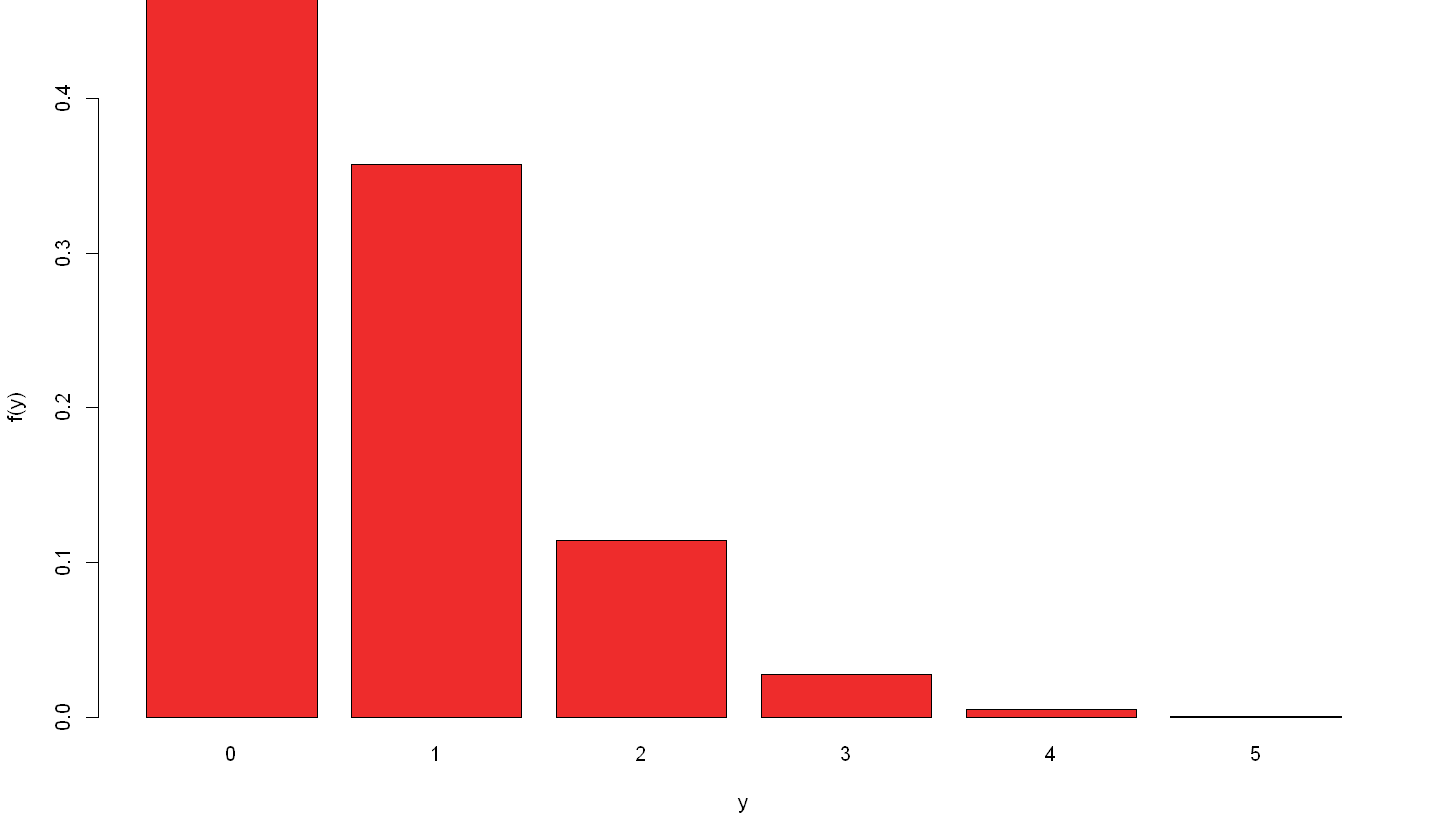

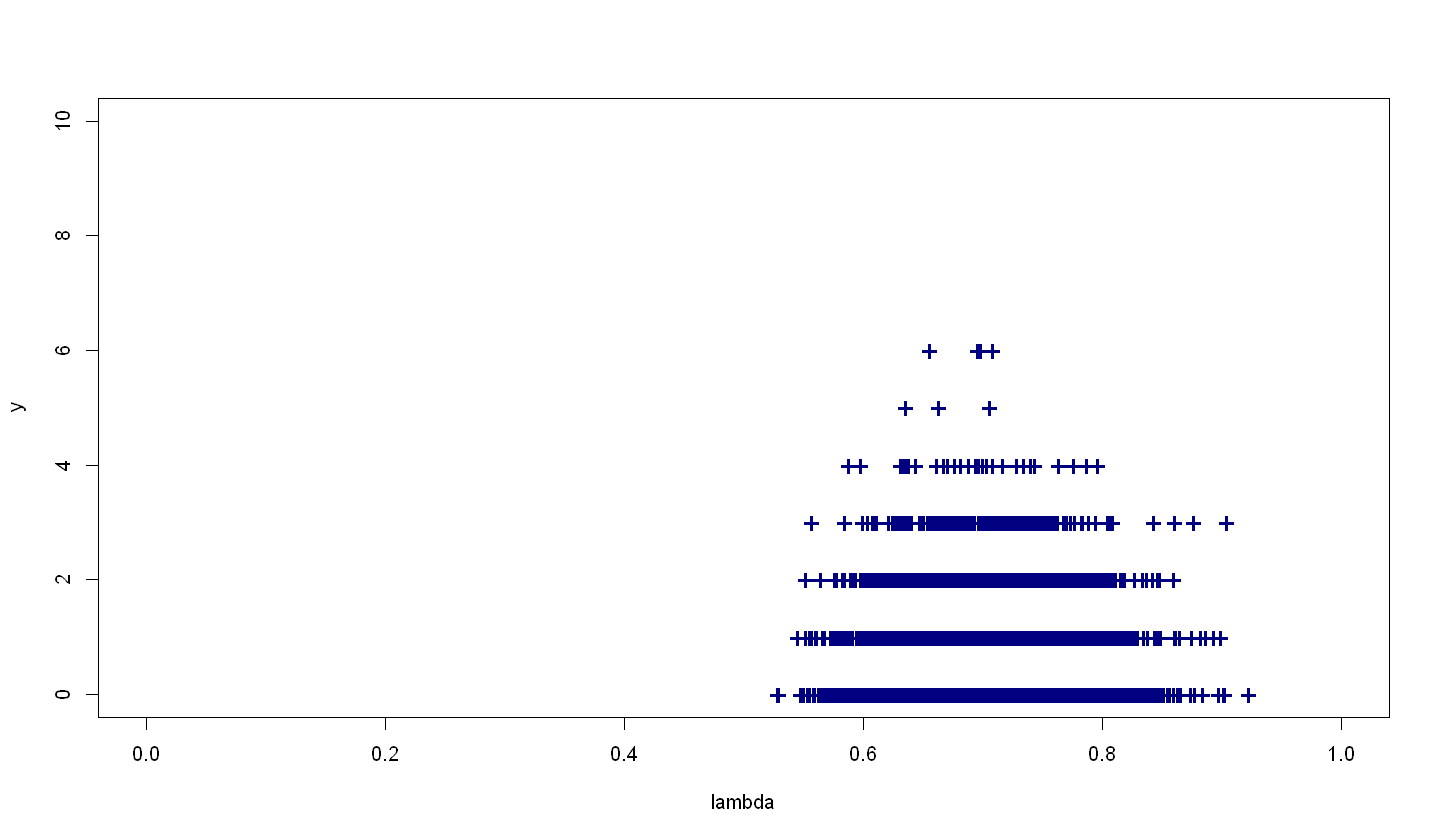

In [44]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain2.df <- as.data.frame( as.mcmc(chain2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain2.df))
#
# p inference result
#
hist(chain2.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain2.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data1$n_next))
#
# Correlation between p and predicted variable
#
plot(chain2.df$lambda, chain1.df$y, xlab='lambda', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))

#### Jeffrey's prior

In [45]:
modelString = "
    model{
        # data likelihood 
        for (i in 1:length(X)) {
            X[i] ~ dpois(lambda);
        }
        # uniform prior for lambda
        lambda ~ dbeta(1/2, 1/2)

        # Predicted data , given p
        y ~ dpois(lambda);
    }
"

writeLines ( modelString , con=paste(dir, "model_5_j.txt", sep="/"))

In [46]:
data_obs1 <- rep(y, n1)

data1 <- NULL
data1$X <- data_obs1
data1$min.prior <- 0
data1$max.prior <- 10


data_obs2 <- rep(y, n2)

data2 <- NULL
data2$X <- data_obs2
data2$min.prior <- 0
data2$max.prior <- 10


jm1 <- jags.model(file=paste(dir, "model_5_j.txt", sep="/"), data1)
jm2 <- jags.model(file=paste(dir, "model_5_j.txt", sep="/"), data2)

Warning message in jags.model(file = paste(dir, "model_5_j.txt", sep = "/"), data1):
"Unused variable "min.prior" in data"
Warning message in jags.model(file = paste(dir, "model_5_j.txt", sep = "/"), data1):
"Unused variable "max.prior" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 205

Initializing model



Warning message in jags.model(file = paste(dir, "model_5_j.txt", sep = "/"), data2):
"Unused variable "min.prior" in data"
Warning message in jags.model(file = paste(dir, "model_5_j.txt", sep = "/"), data2):
"Unused variable "max.prior" in data"


Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 285

Initializing model



In [47]:
# Update the Markov chain (Burn -in)
update(jm1 , 1000)
chain1 <- coda.samples(jm1 , c("lambda", "y"), n.iter=10000)
print(summary(chain1))


update(jm2 , 1000)
chain2 <- coda.samples(jm2 , c("lambda", "y"), n.iter=10000)
print(summary(chain2))


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.6162 0.05629 0.0005629      0.0006926
y      0.6244 0.78917 0.0078917      0.0078917

2. Quantiles for each variable:

         2.5%    25%    50%   75%  97.5%
lambda 0.5125 0.5769 0.6146 0.653 0.7304
y      0.0000 0.0000 0.0000 1.000 3.0000


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.7065 0.05101 0.0005101      0.0006529
y      0.7078 0.84587 0.0084587      0.0084587

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
lambda 0.6099 0.6718 0.7053 0.7397 0.8107
y      0.0000 0.0000 1.0000 1.0000 3.0000



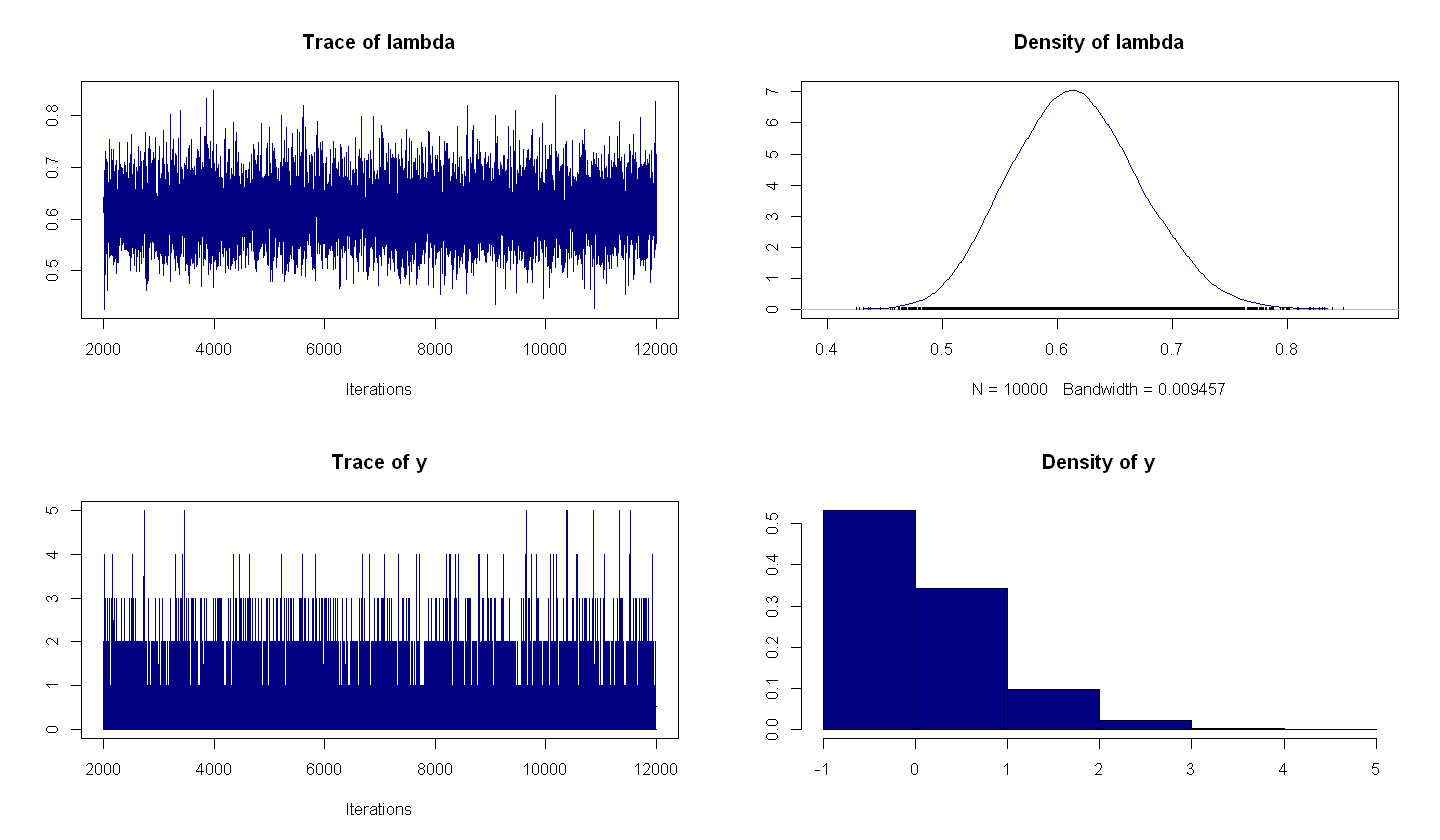

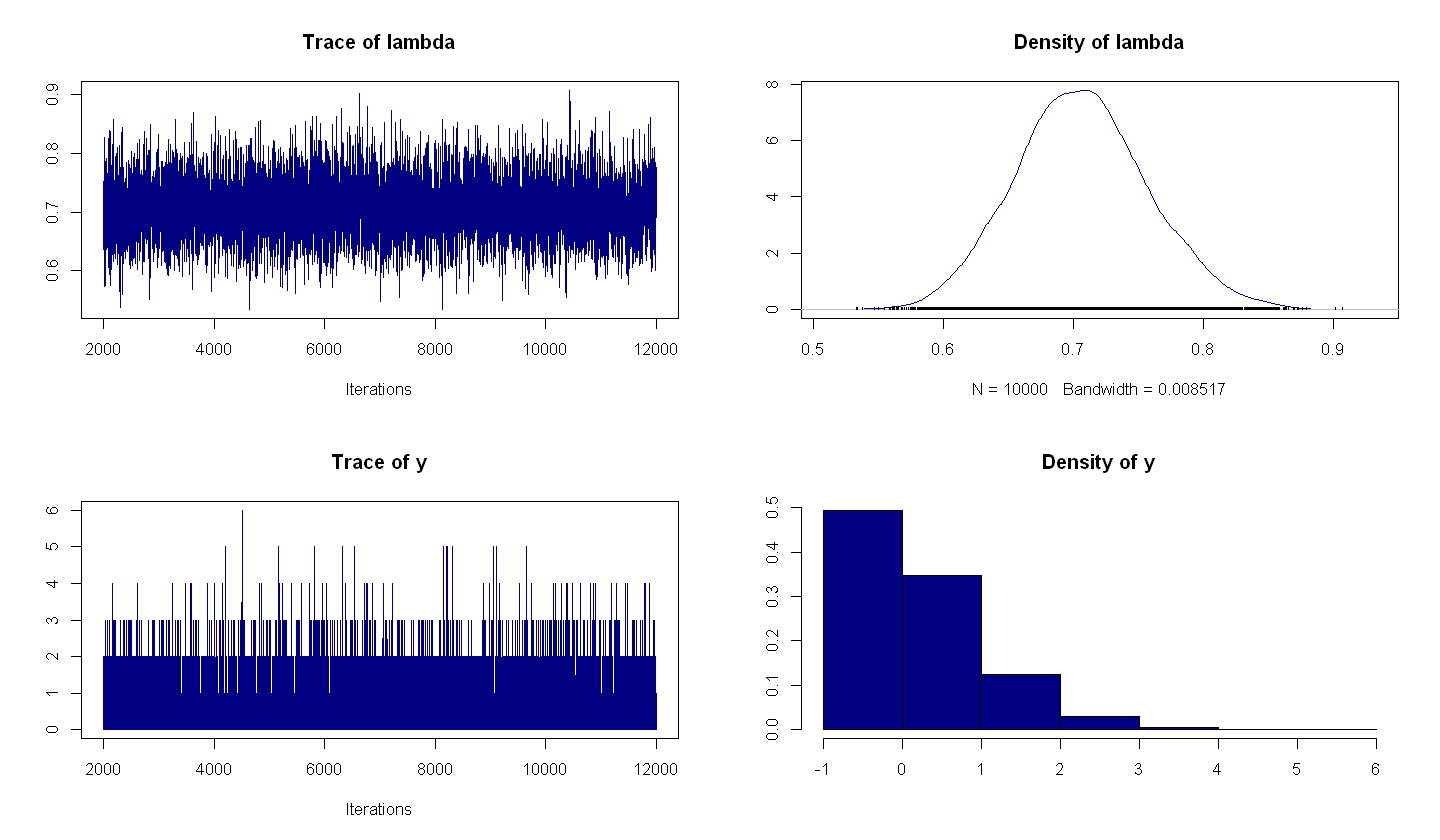

In [48]:
options(repr.plot.width = 12, repr.plot.height = 7)
plot(chain1 , col="navy")
plot(chain2 , col="navy")


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.08403806
y      0.08403806 1.00000000


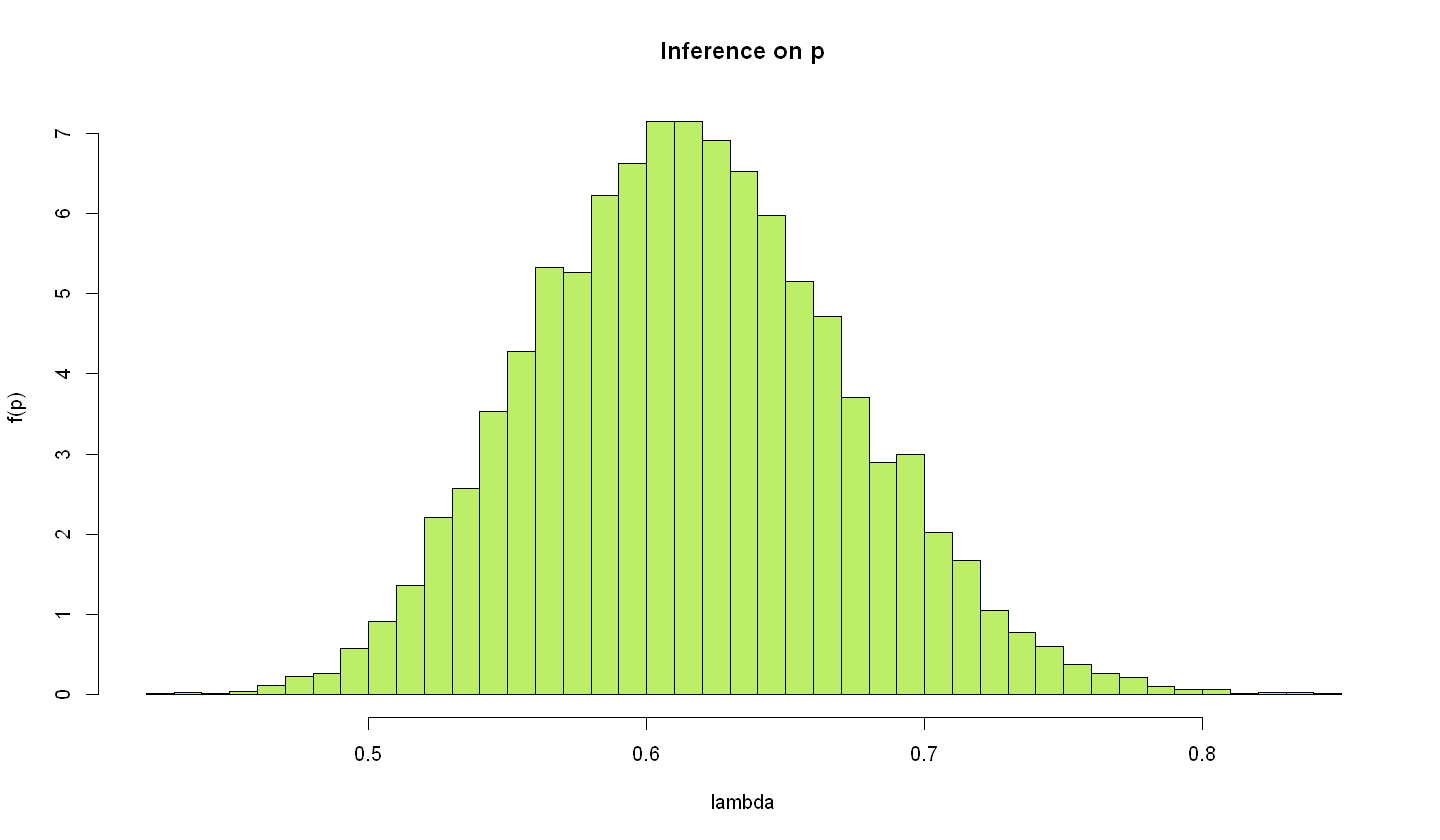

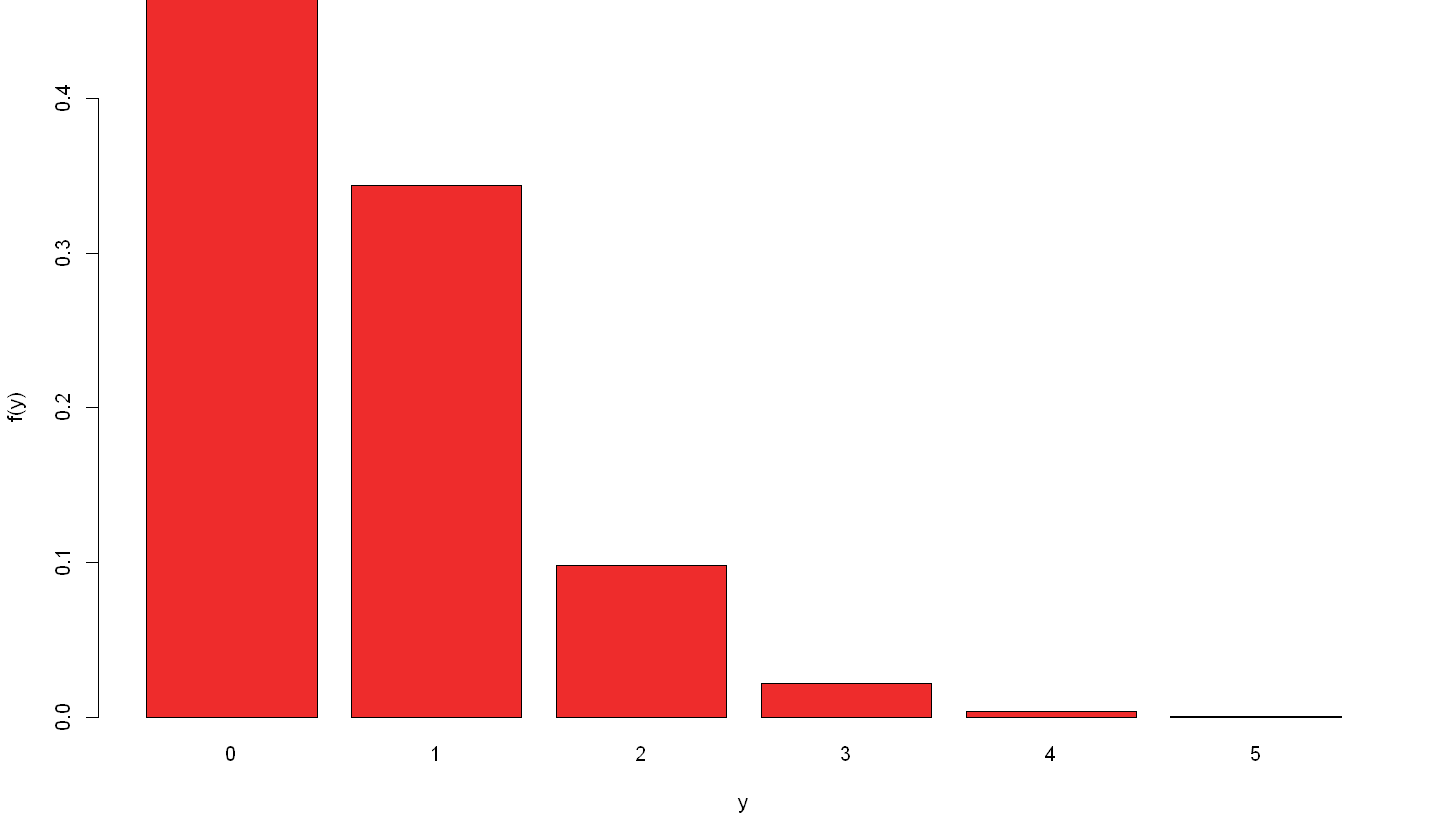

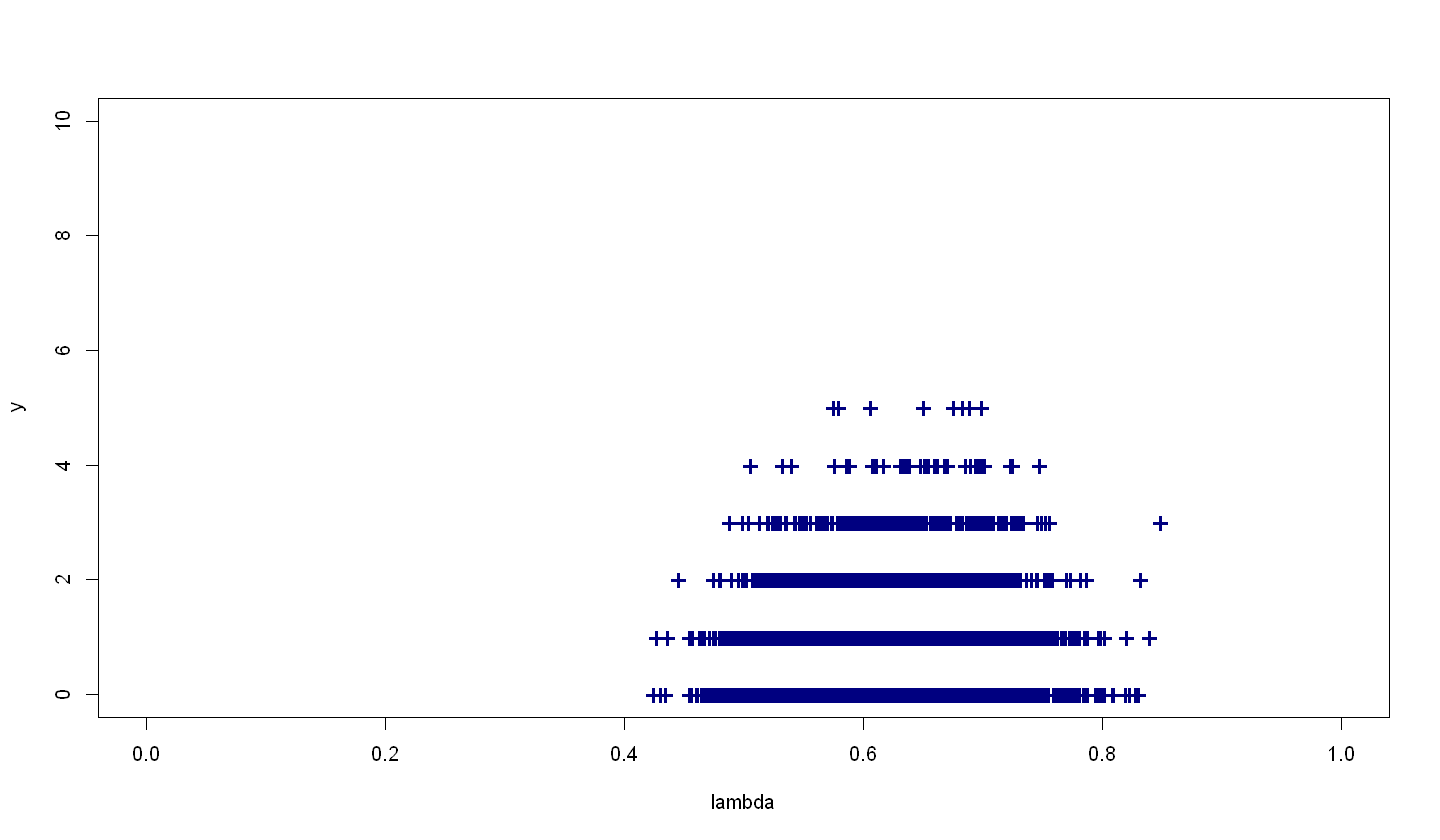

In [49]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain1.df <- as.data.frame( as.mcmc(chain1) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain1.df))
#
# p inference result
#
hist(chain1.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain1.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data1$n_next))
#
# Correlation between p and predicted variable
#
plot(chain1.df$lambda, chain1.df$y, xlab='lambda', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.05271783
y      0.05271783 1.00000000


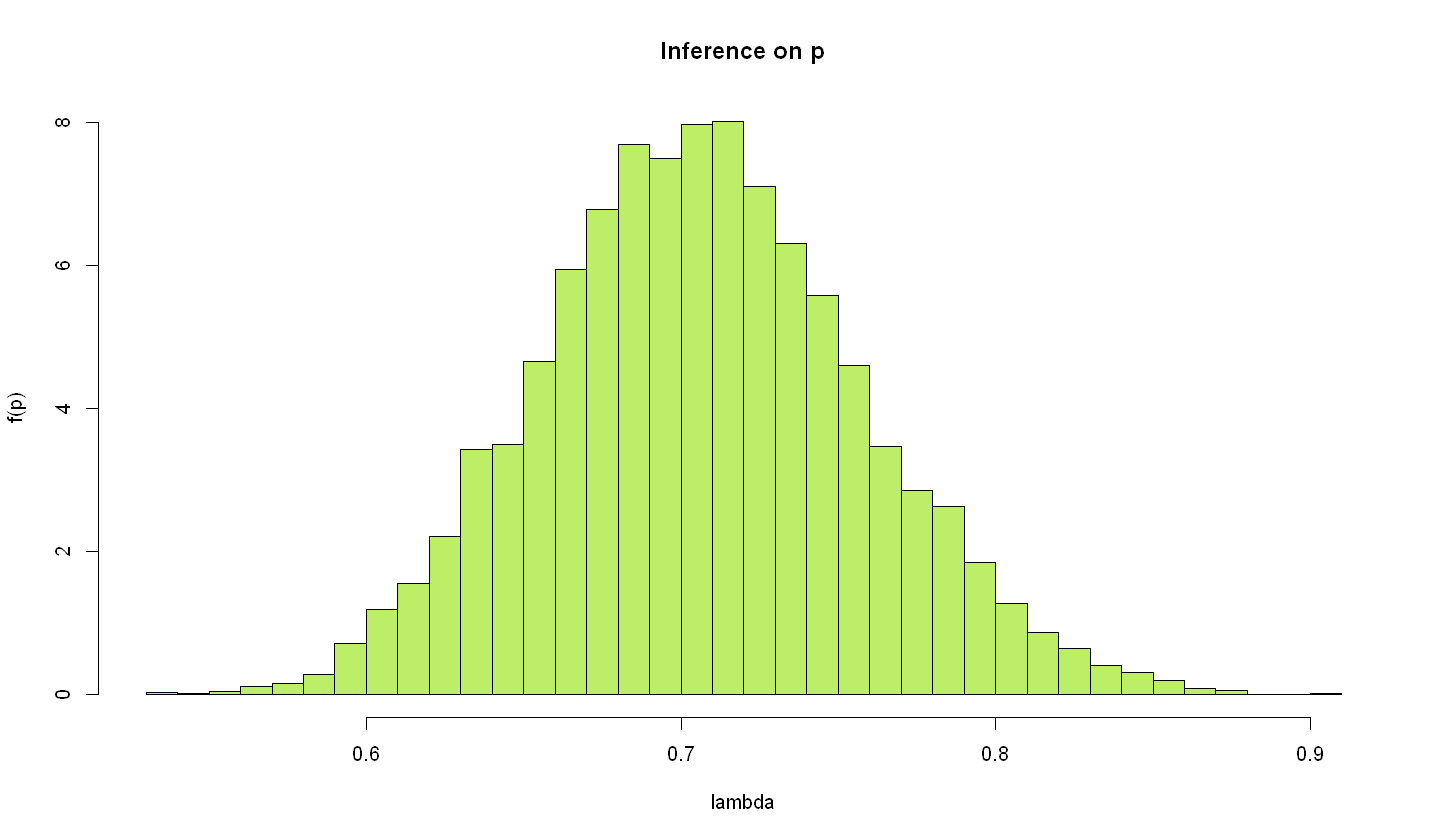

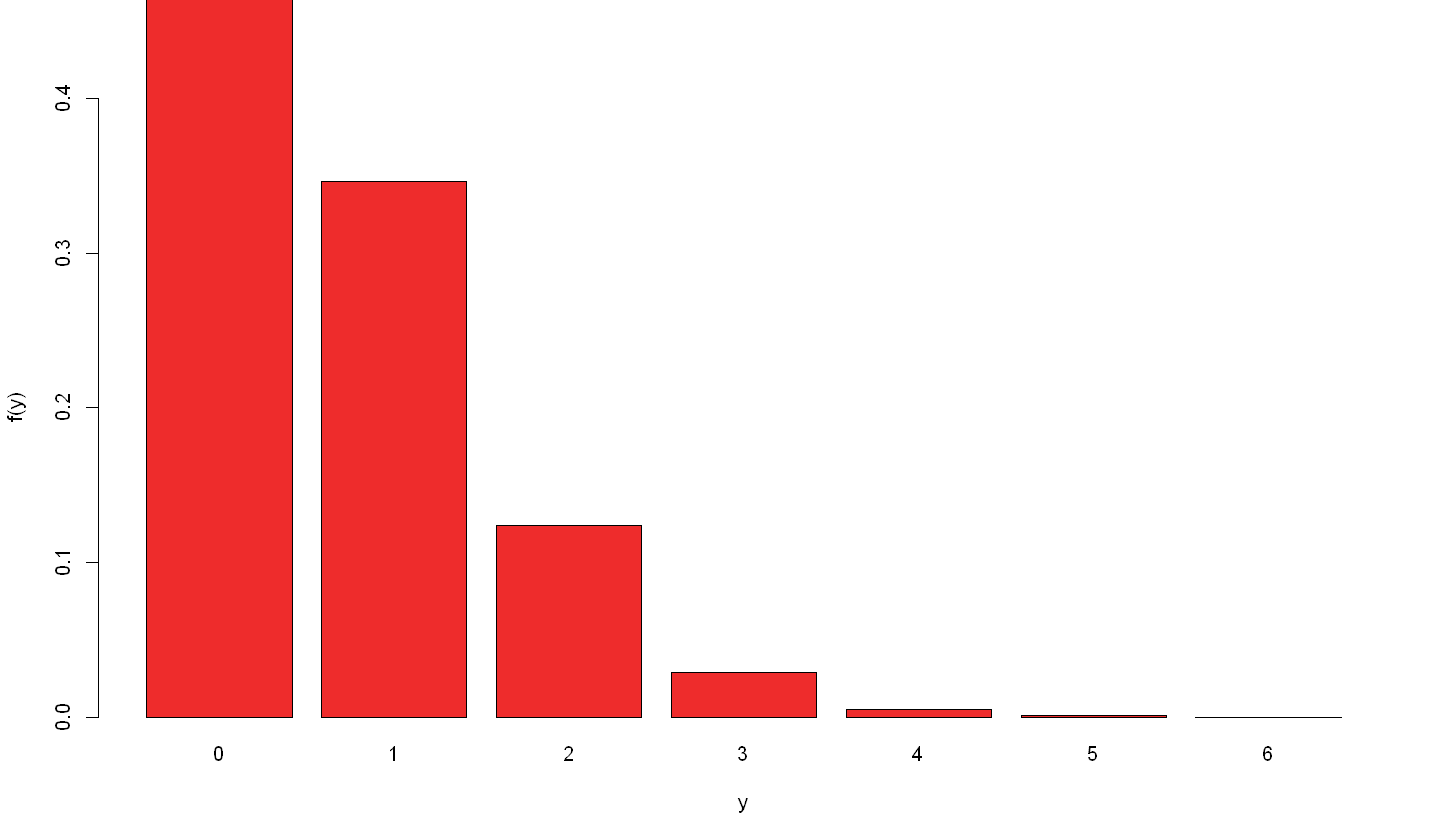

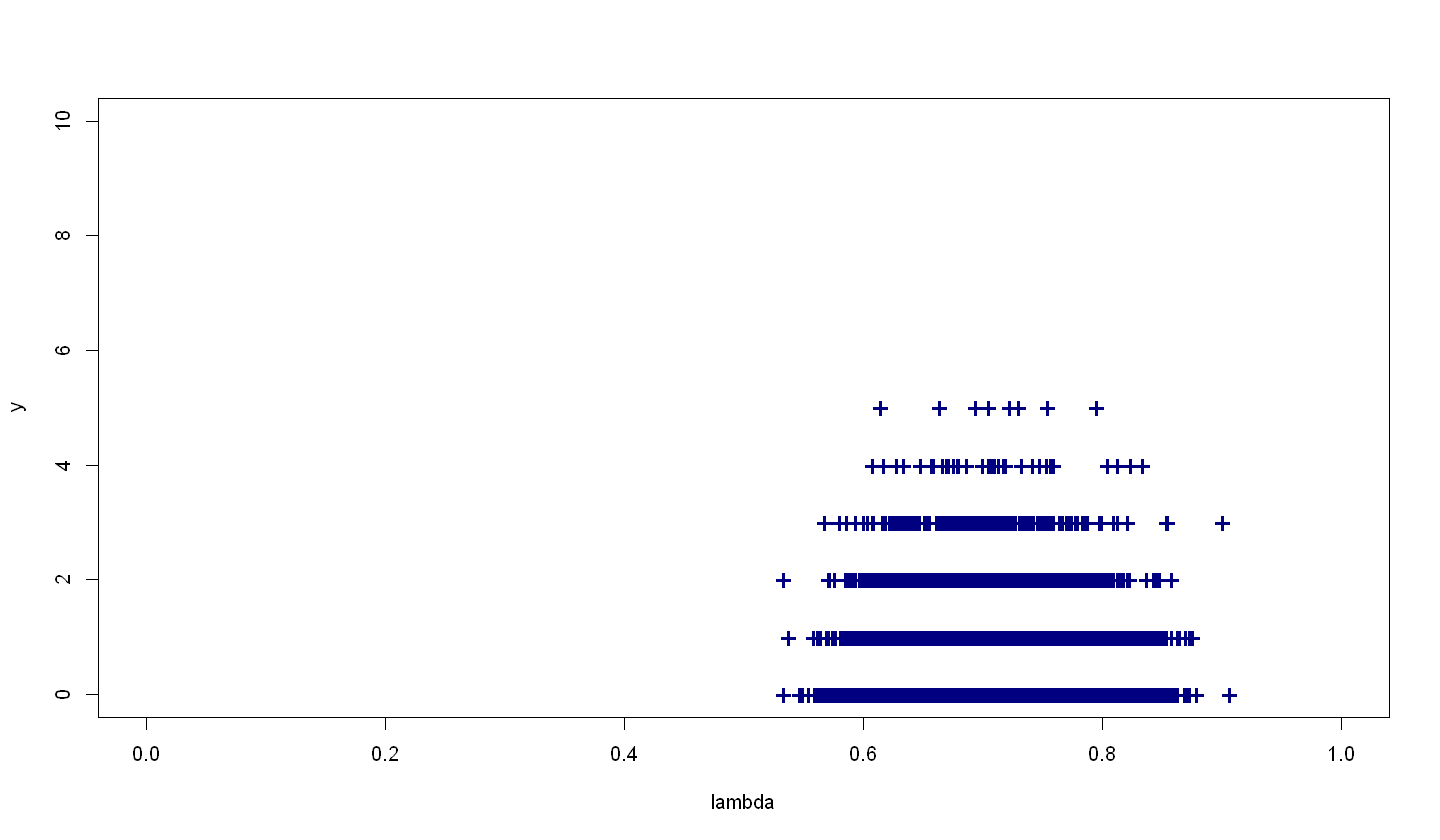

In [50]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain2.df <- as.data.frame( as.mcmc(chain2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain2.df))
#
# p inference result
#
hist(chain2.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain2.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data1$n_next))
#
# Correlation between p and predicted variable
#
plot(chain2.df$lambda, chain1.df$y, xlab='lambda', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))

In [51]:
modelString = "
    model{
        # data likelihood 
        for (i in 1:length(X)) {
            X[i] ~ dpois(lambda);
        }
        # uniform prior for lambda
        lambda ~ dunif(min.prior, max.prior)

        # Predicted data , given p
        y ~ dpois(lambda);
    }
"

writeLines ( modelString , con=paste(dir, "model_5.txt", sep="/"))

In [52]:
data_obs1 <- rep(y, n1)

data1 <- NULL
data1$X <- data_obs1
data1$min.prior <- 0
data1$max.prior <- 10


data_obs2 <- rep(y, n2)

data2 <- NULL
data2$X <- data_obs2
data2$min.prior <- 0
data2$max.prior <- 10


jm1 <- jags.model(file=paste(dir, "model_5.txt", sep="/"), data1)
jm2 <- jags.model(file=paste(dir, "model_5.txt", sep="/"), data2)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 200
   Unobserved stochastic nodes: 2
   Total graph size: 204

Initializing model

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 280
   Unobserved stochastic nodes: 2
   Total graph size: 284

Initializing model



In [53]:
# Update the Markov chain (Burn -in)
update(jm1 , 1000)
chain1 <- coda.samples(jm1 , c("lambda", "y"), n.iter=10000)
print(summary(chain1))


update(jm2 , 1000)
chain2 <- coda.samples(jm2 , c("lambda", "y"), n.iter=10000)
print(summary(chain2))


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.6149 0.05509 0.0005509      0.0007057
y      0.6128 0.78482 0.0078482      0.0075085

2. Quantiles for each variable:

         2.5%    25%    50%    75%  97.5%
lambda 0.5111 0.5763 0.6136 0.6521 0.7272
y      0.0000 0.0000 0.0000 1.0000 2.0000


Iterations = 2001:12000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

         Mean      SD  Naive SE Time-series SE
lambda 0.7035 0.05027 0.0005027      0.0006328
y      0.7105 0.84744 0.0084744      0.0084744

2. Quantiles for each variable:

         2.5%   25%    50%   75%  97.5%
lambda 0.6089 0.669 0.7016 0.737 0.8056
y      0.0000 0.000 1.0000 1.000 3.0000



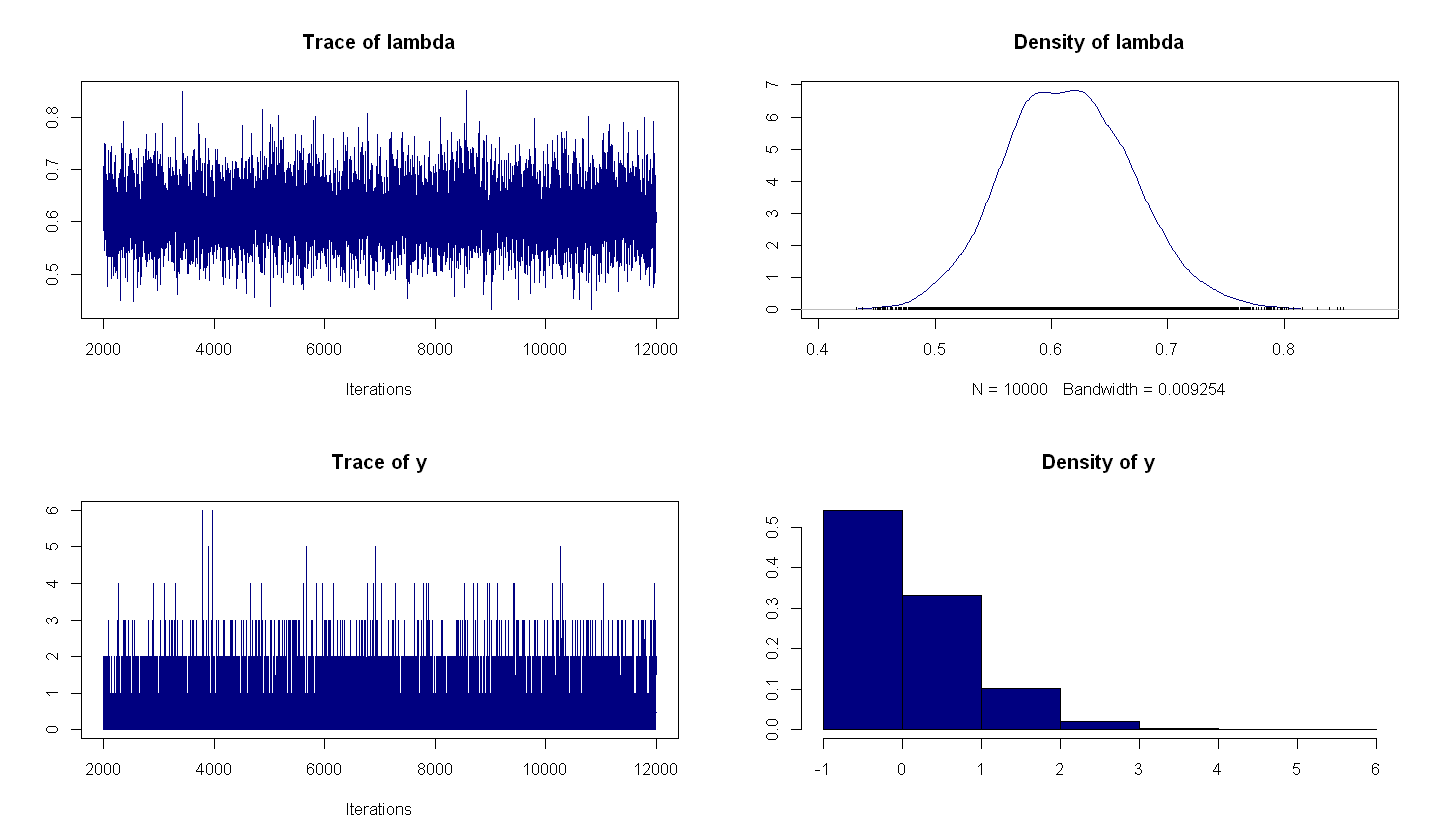

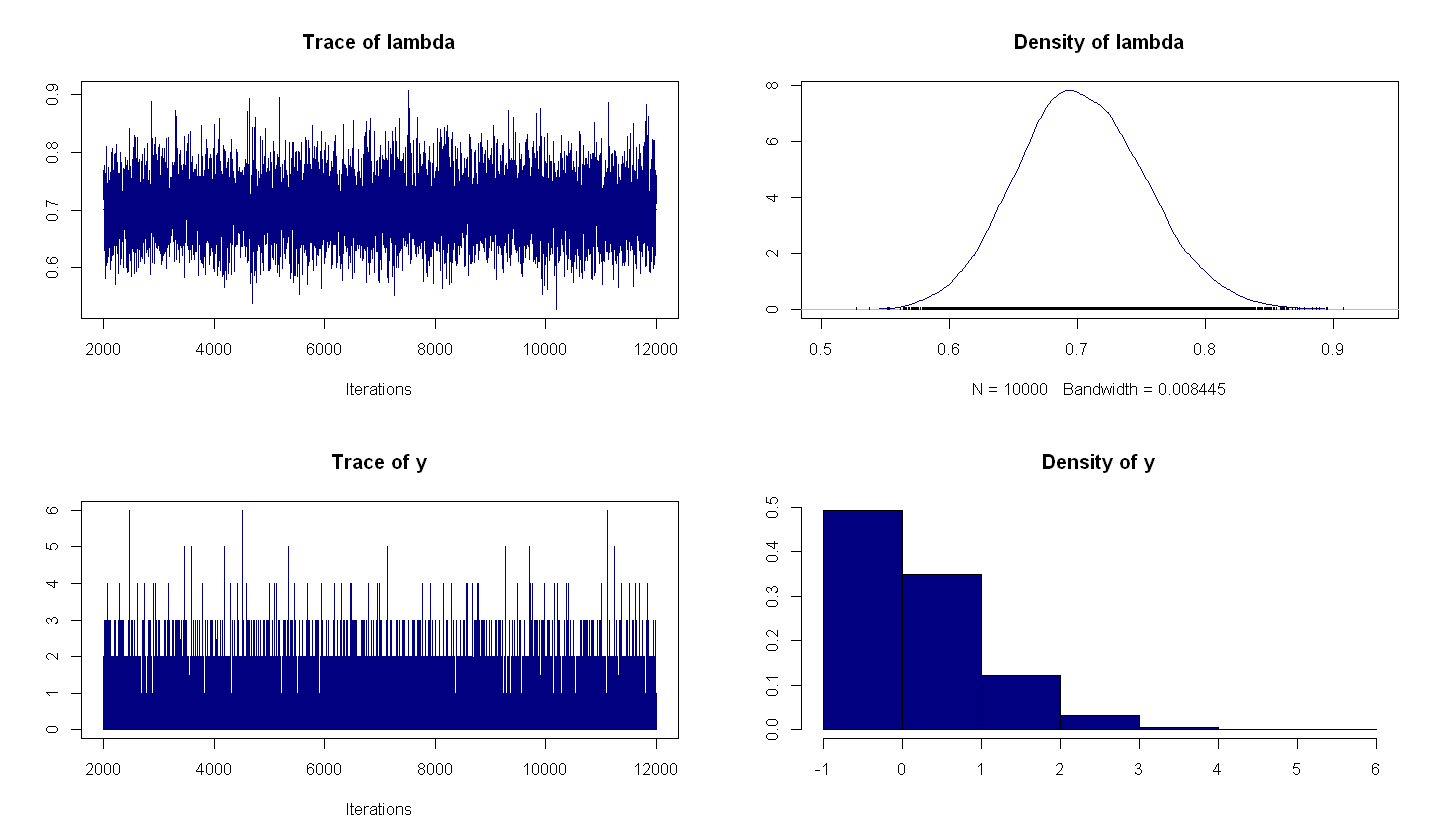

In [54]:
options(repr.plot.width = 12, repr.plot.height = 7)
plot(chain1 , col="navy")
plot(chain2 , col="navy")


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.07187857
y      0.07187857 1.00000000


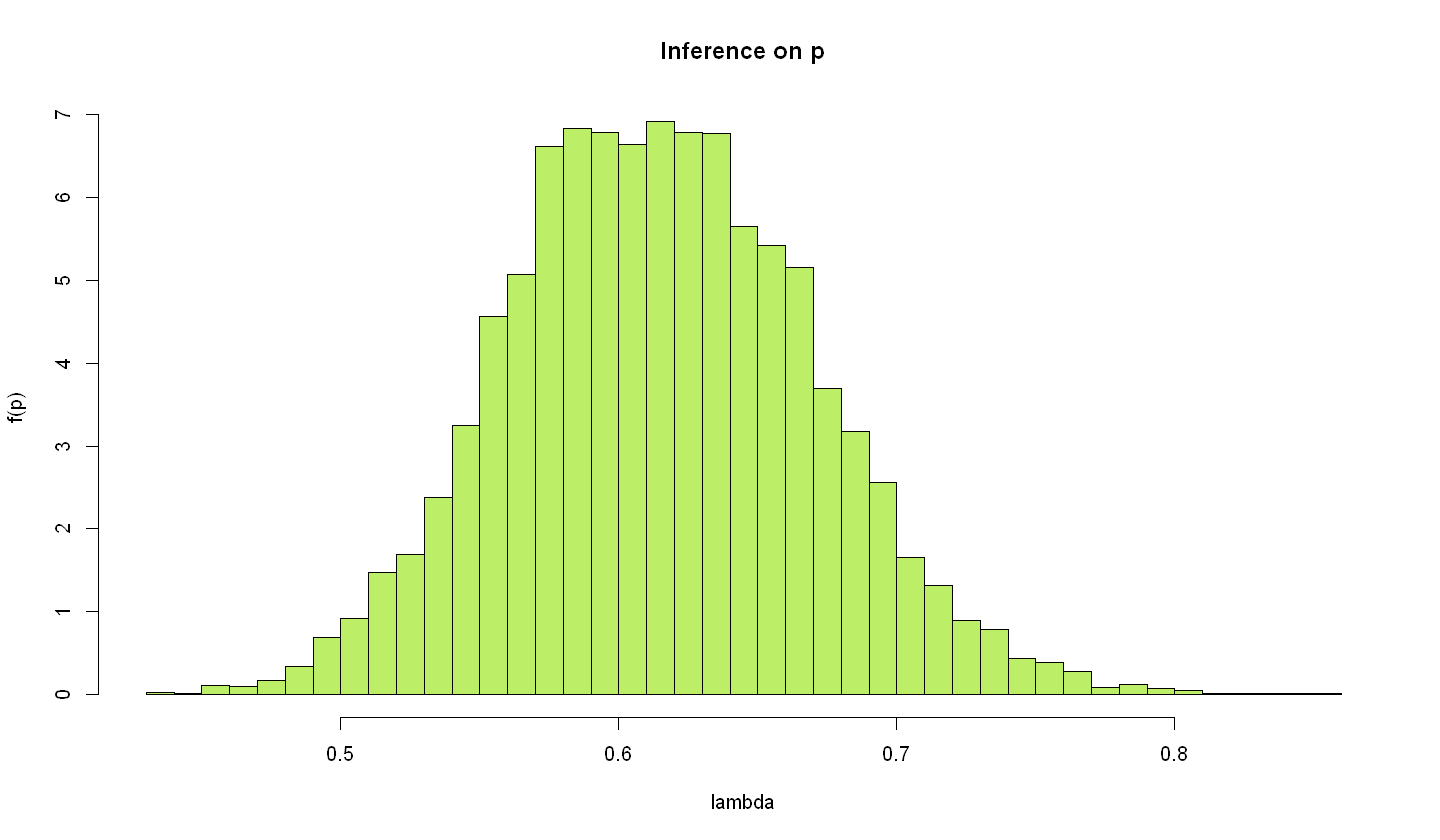

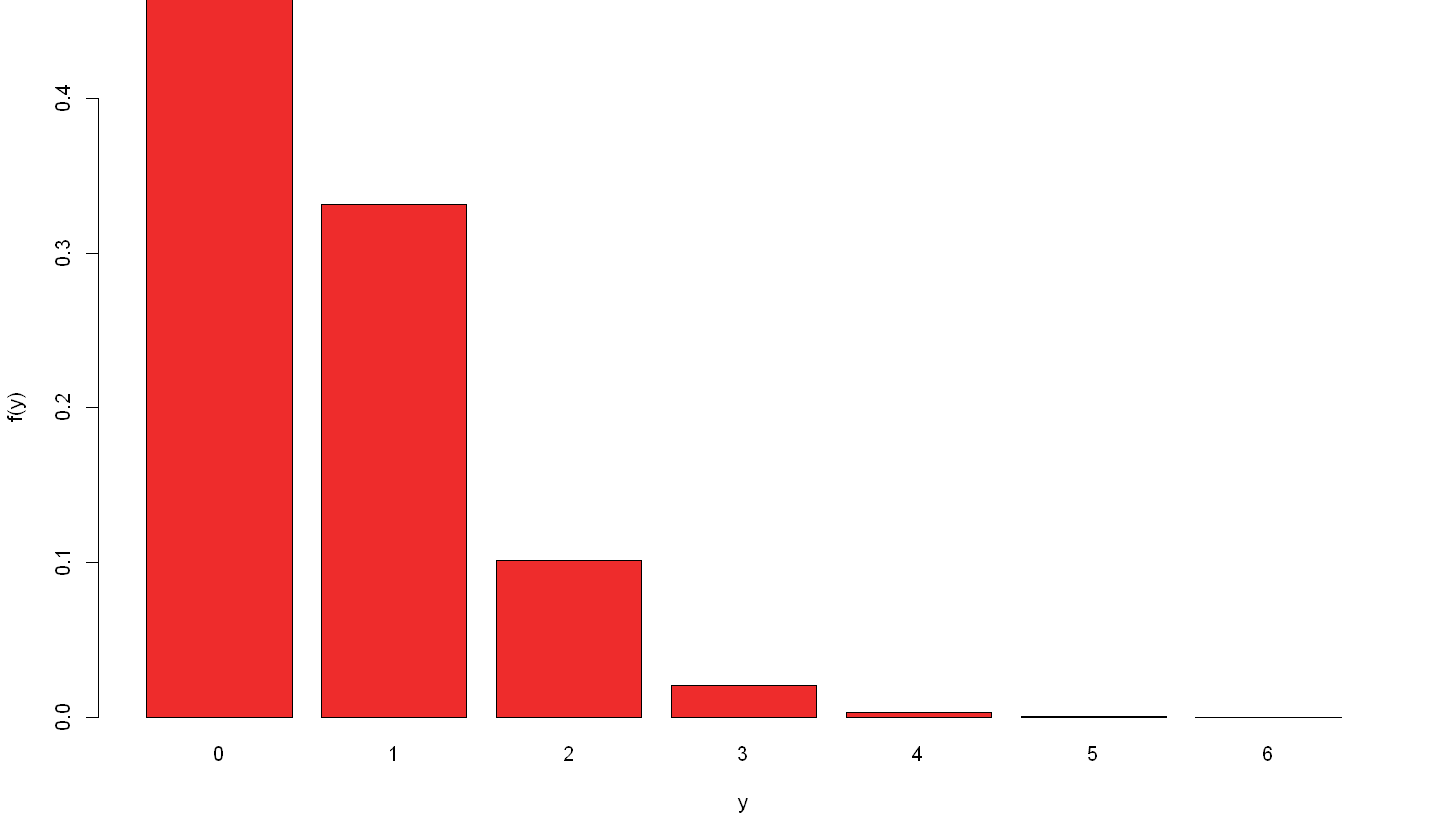

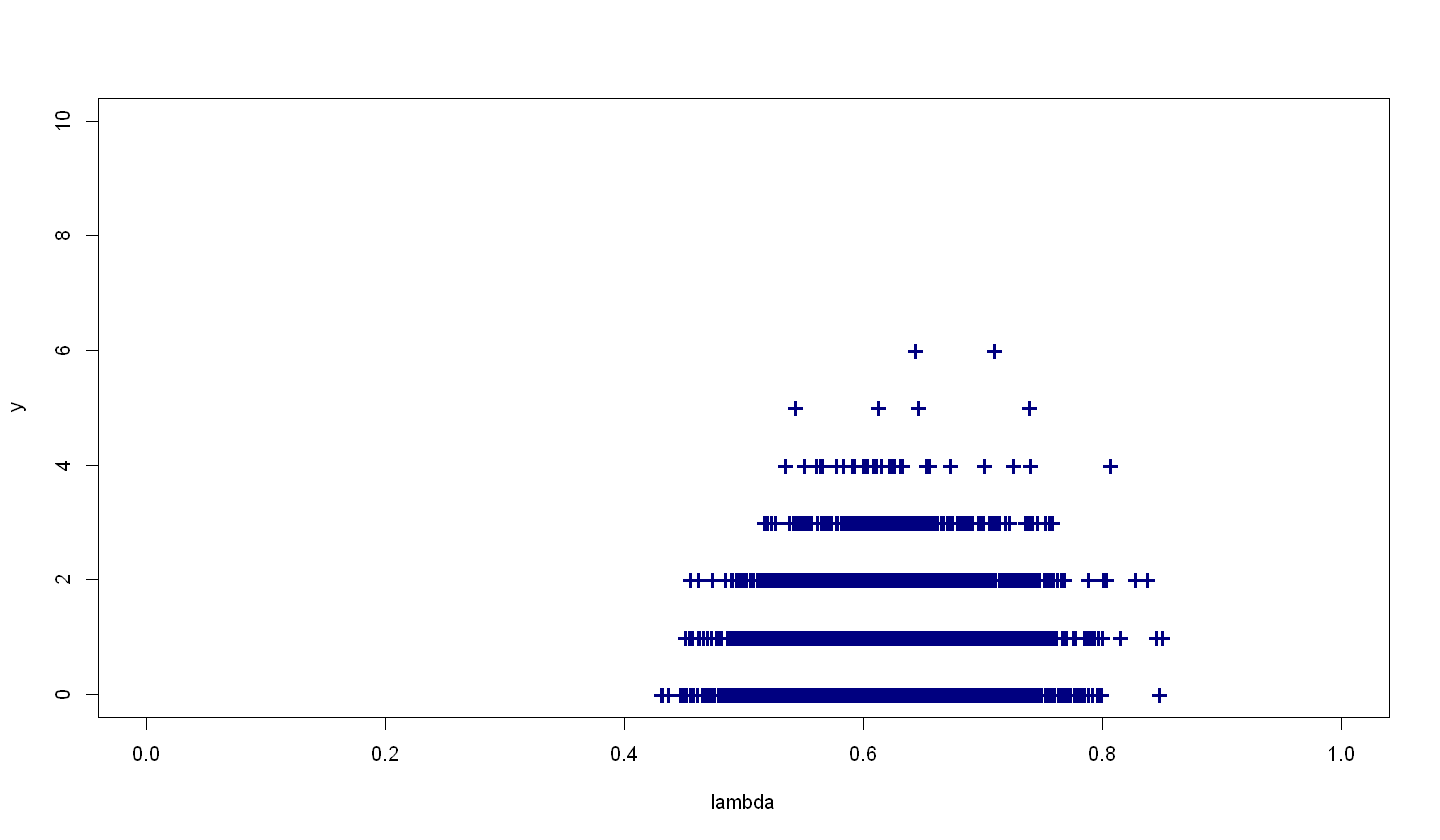

In [55]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain1.df <- as.data.frame( as.mcmc(chain1) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain1.df))
#
# p inference result
#
hist(chain1.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain1.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data1$n_next))
#
# Correlation between p and predicted variable
#
plot(chain1.df$lambda, chain1.df$y, xlab='lambda', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))


 Correlation matrix: 
           lambda          y
lambda 1.00000000 0.05715209
y      0.05715209 1.00000000


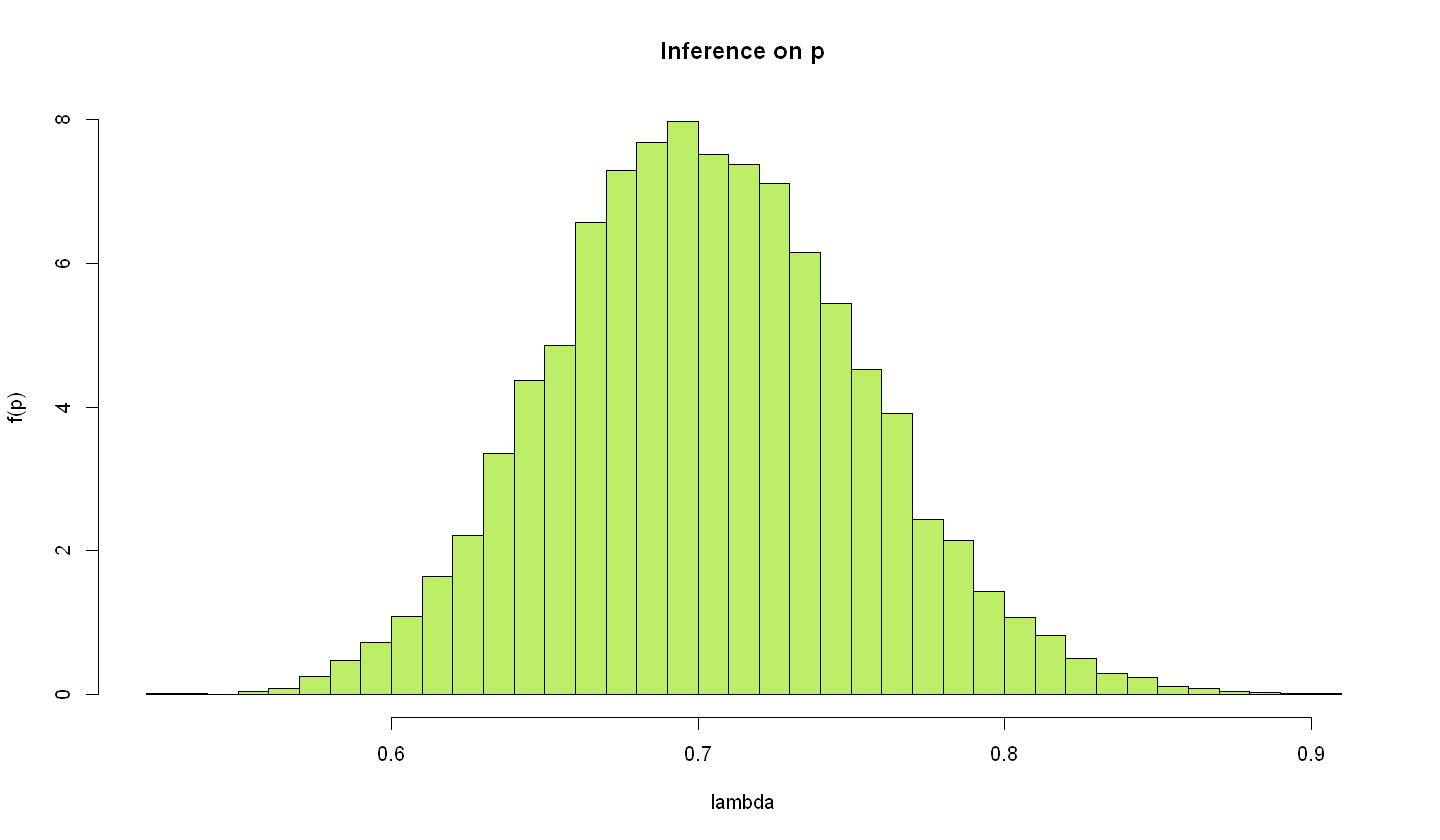

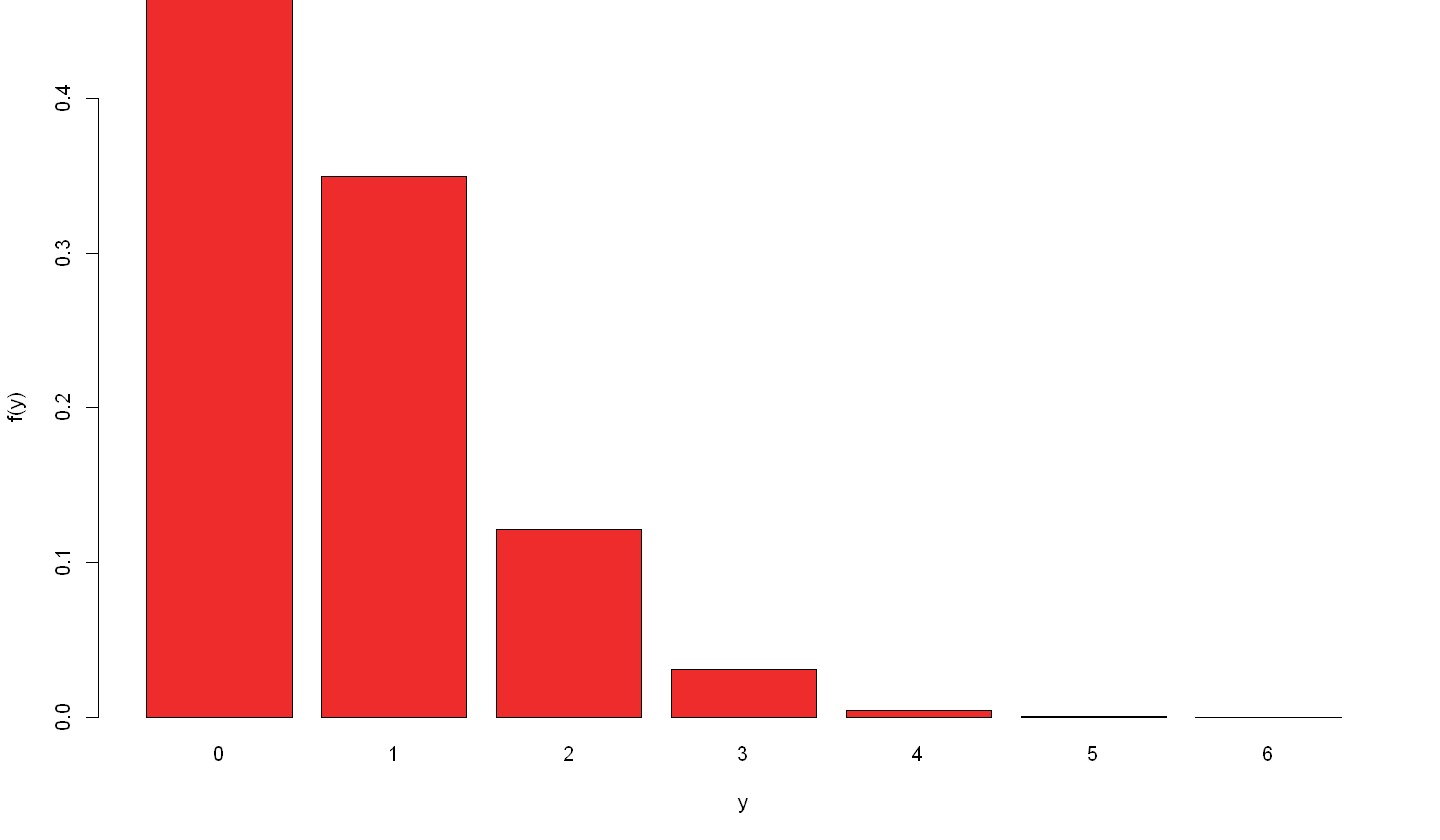

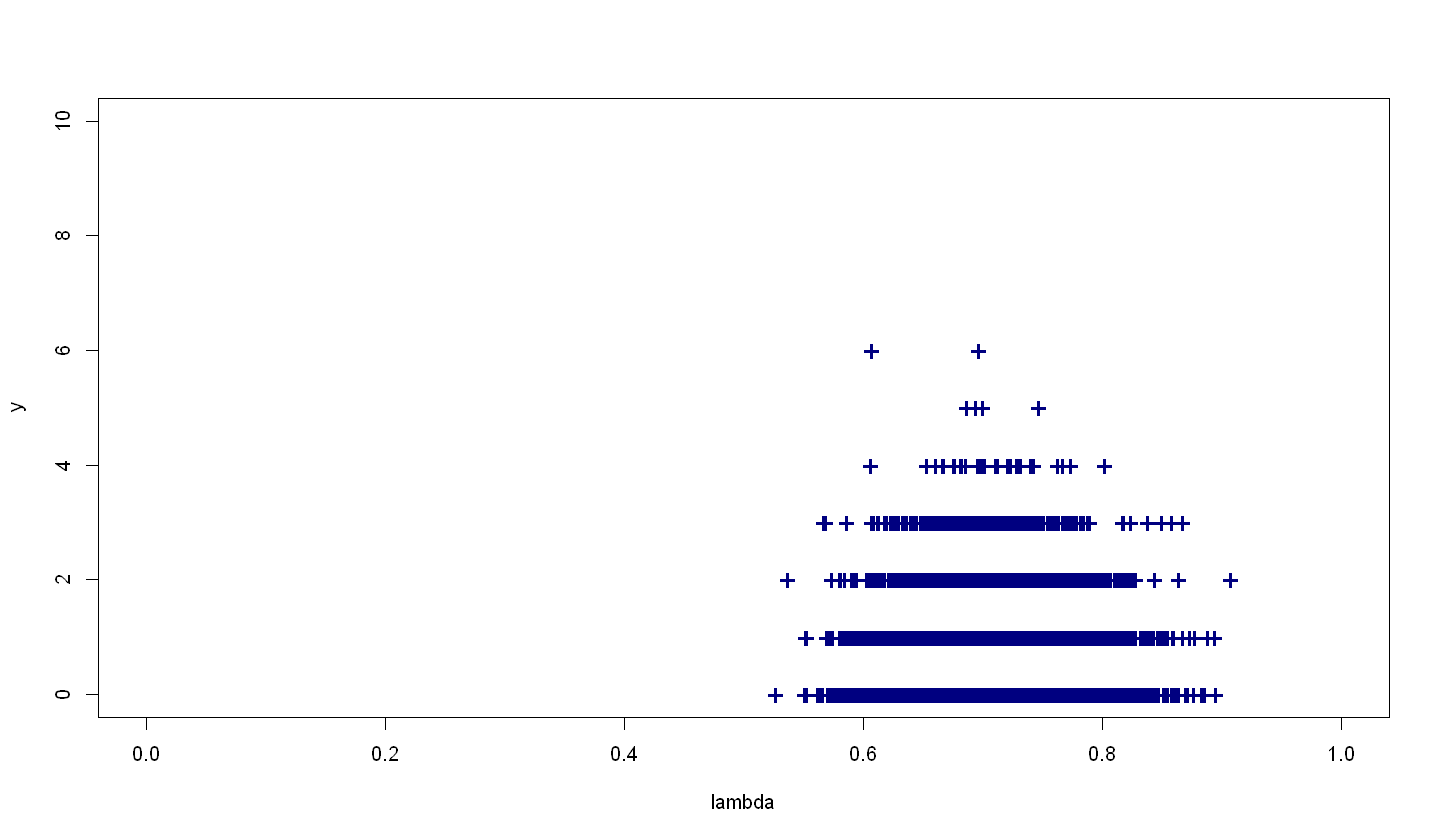

In [56]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain2.df <- as.data.frame( as.mcmc(chain2) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain2.df))
#
# p inference result
#
hist(chain2.df$lambda, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='lambda', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain2.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data1$n_next))
#
# Correlation between p and predicted variable
#
plot(chain2.df$lambda, chain1.df$y, xlab='lambda', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))

## Exercise 6 - Ex3 with MCMC with JAGS <a class="anchor" id="ex6"></a>

In [57]:
alpha.prior<-1
beta.prior <-10
x <- 11
n <- 75
data_obs <- rep(c(0, 1), c(n-x, x))

data <- NULL
data$X <- data_obs
data$n <- n

data$n_next <- 10 # Predictions

data$alpha <- alpha.prior
data$beta  <- beta.prior

jm <- jags.model(file=paste(dir, "model_4.txt", sep="/"), data)

Compiling model graph
   Resolving undeclared variables
   Allocating nodes
Graph information:
   Observed stochastic nodes: 75
   Unobserved stochastic nodes: 2
   Total graph size: 81

Initializing model



In [58]:
# Update the Markov chain (Burn -in)
update(jm , 1000)
chain <- coda.samples(jm , c("p", "y"), n.iter=10000)
print(summary(chain))


Iterations = 1001:11000
Thinning interval = 1 
Number of chains = 1 
Sample size per chain = 10000 

1. Empirical mean and standard deviation for each variable,
   plus standard error of the mean:

    Mean      SD  Naive SE Time-series SE
p 0.1398 0.03753 0.0003753      0.0003753
y 1.4036 1.16363 0.0116363      0.0116363

2. Quantiles for each variable:

     2.5%    25%    50%    75%  97.5%
p 0.07493 0.1131 0.1371 0.1632 0.2216
y 0.00000 1.0000 1.0000 2.0000 4.0000



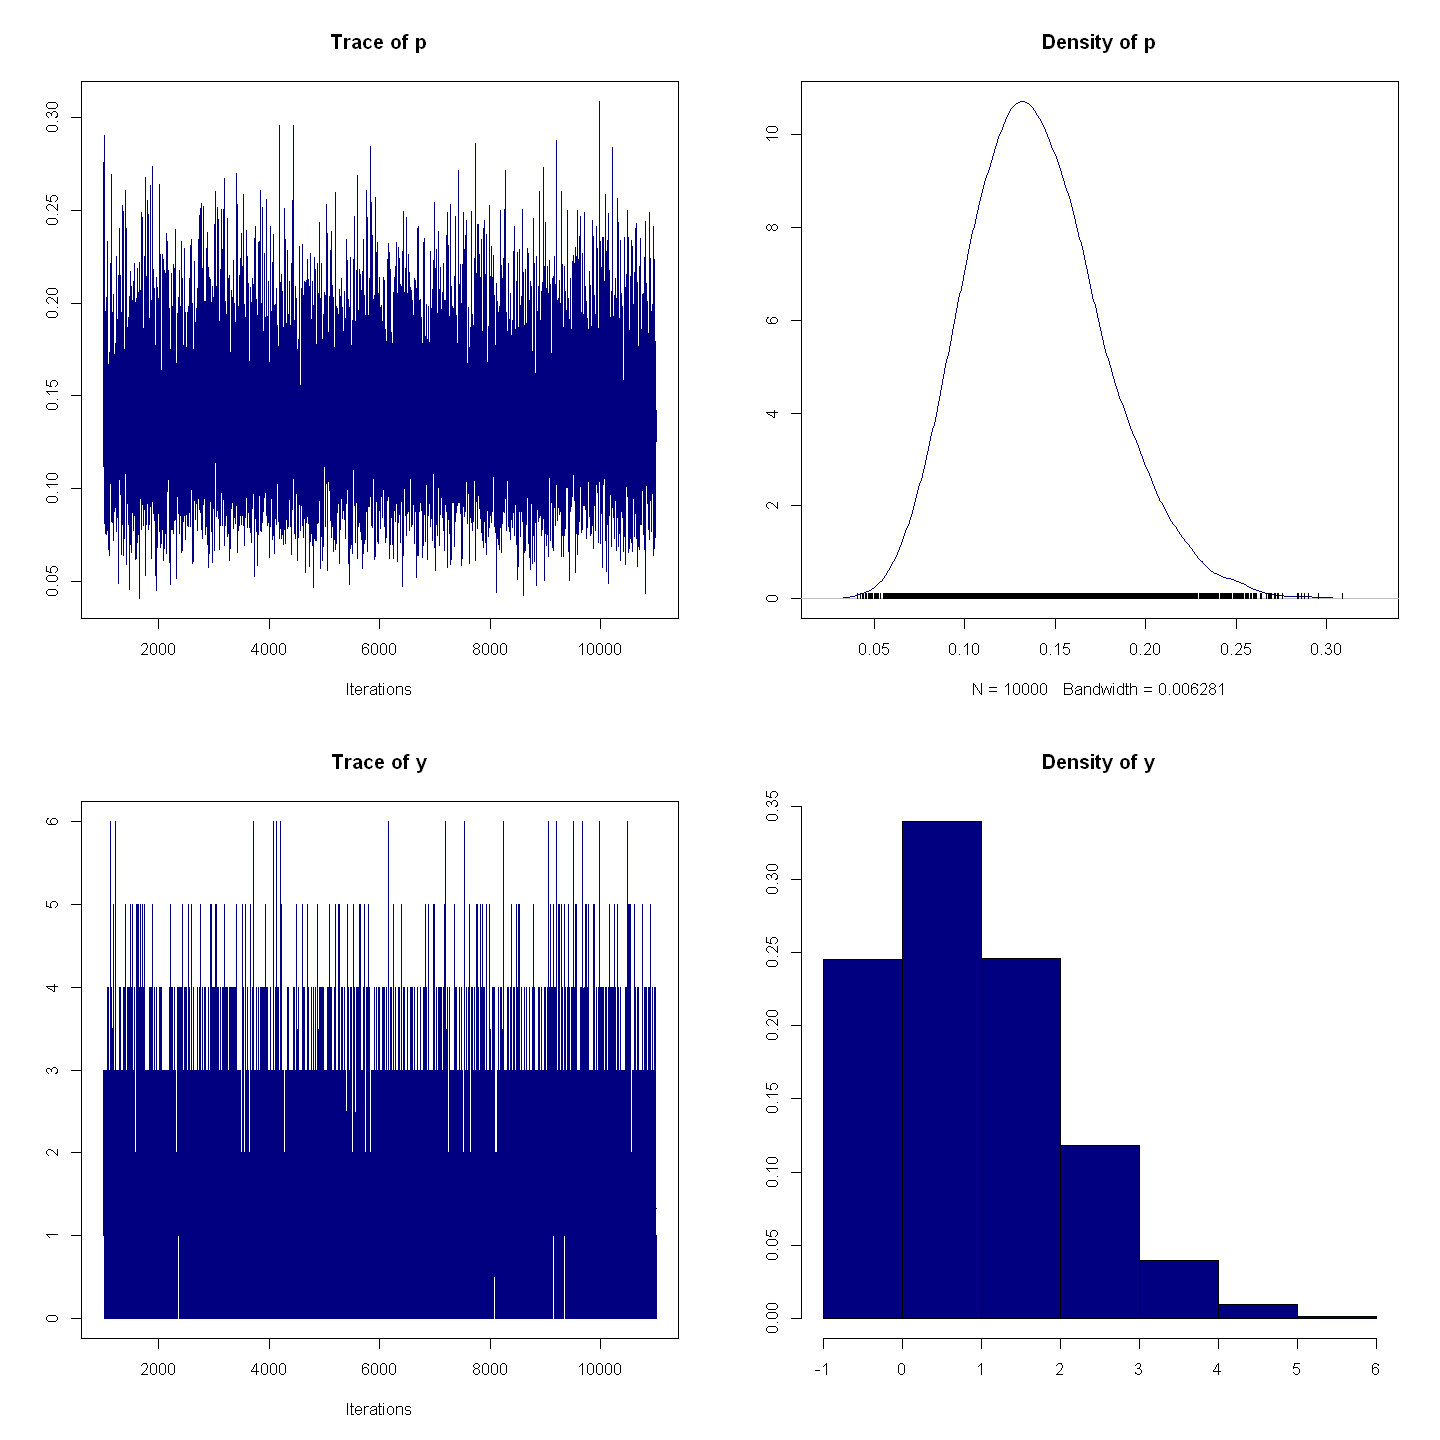

In [59]:
options(repr.plot.width = 12, repr.plot.height = 12)
plot(chain , col="navy")


 Correlation matrix: 
          p         y
p 1.0000000 0.3371754
y 0.3371754 1.0000000


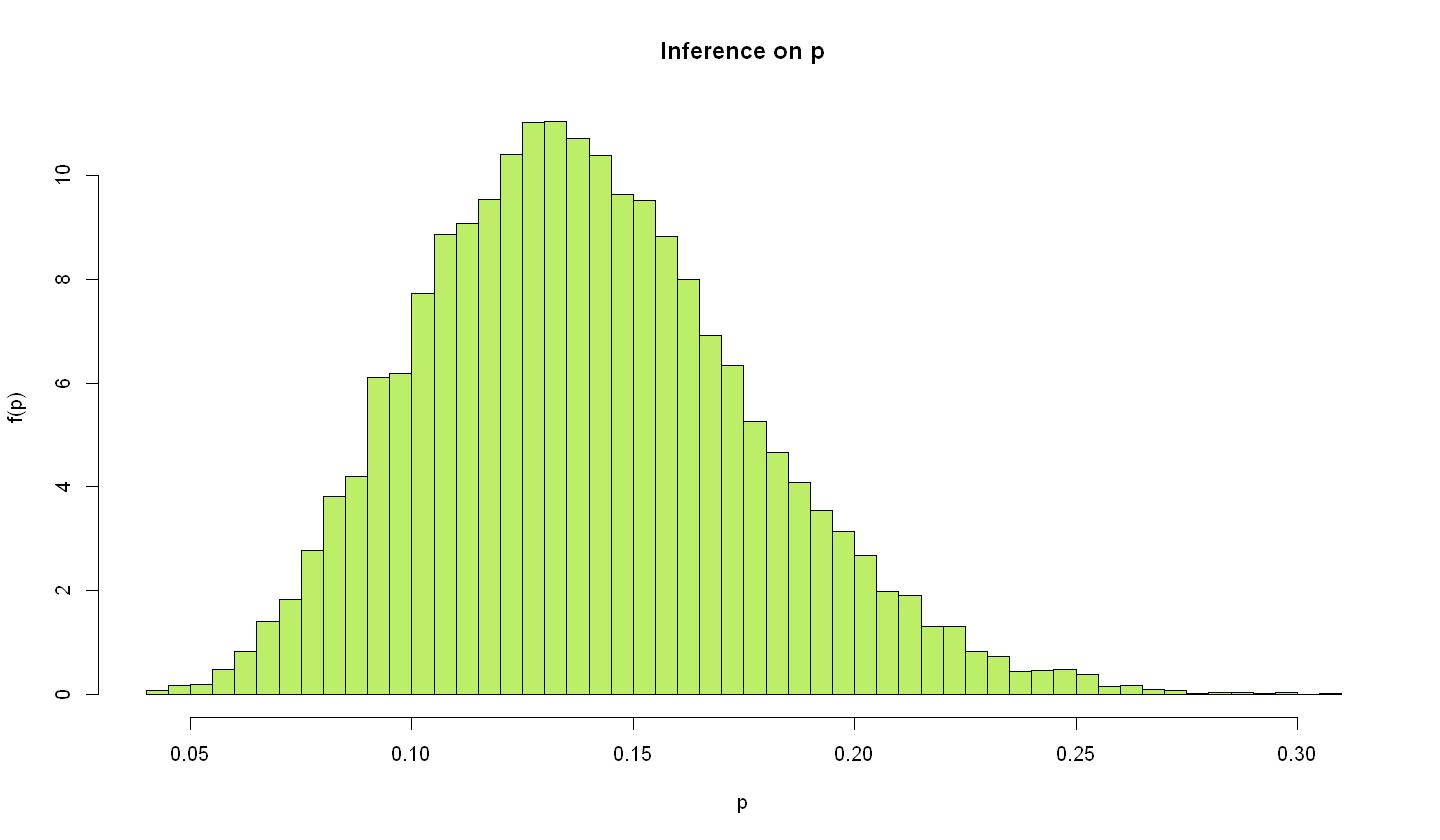

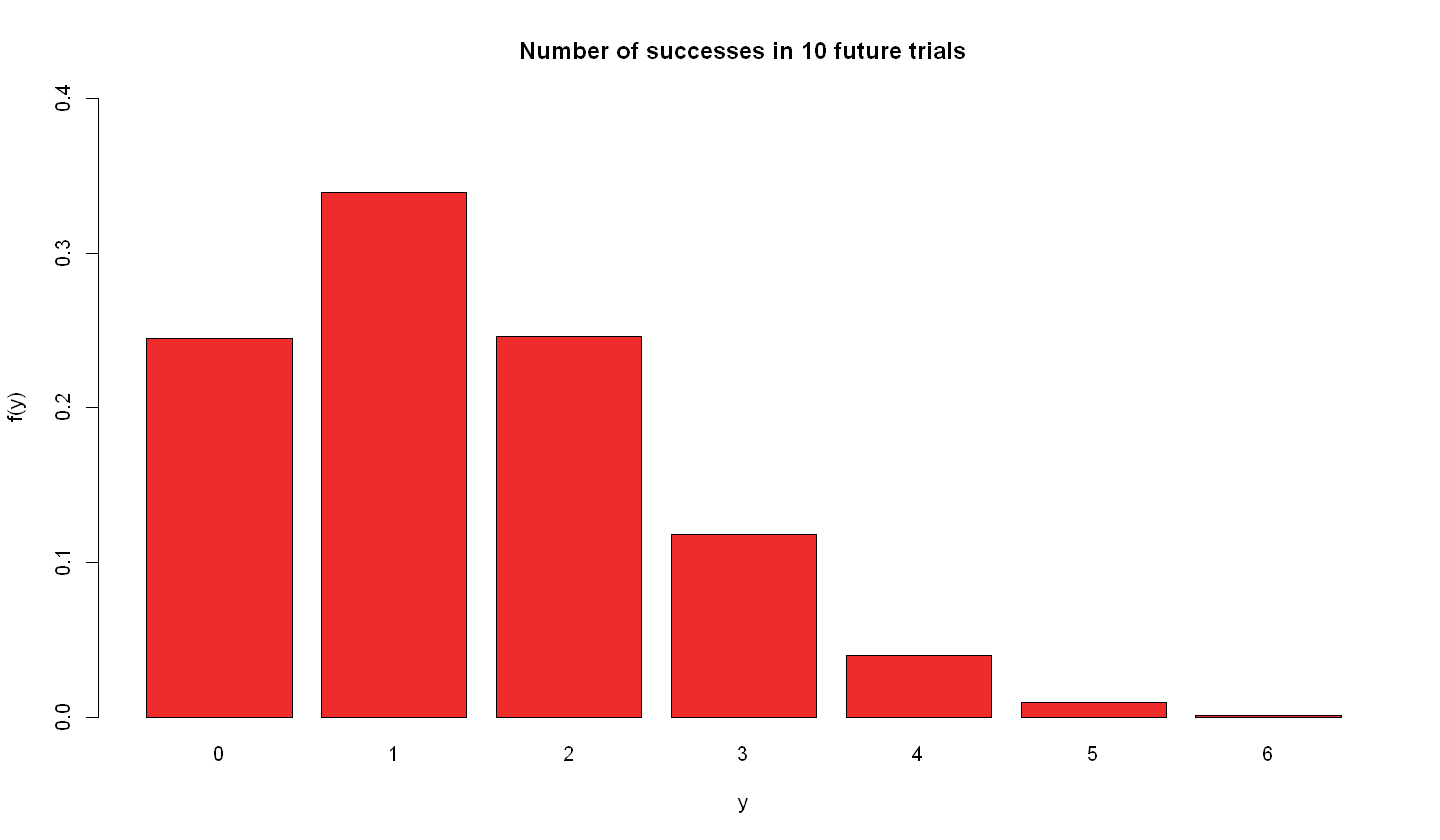

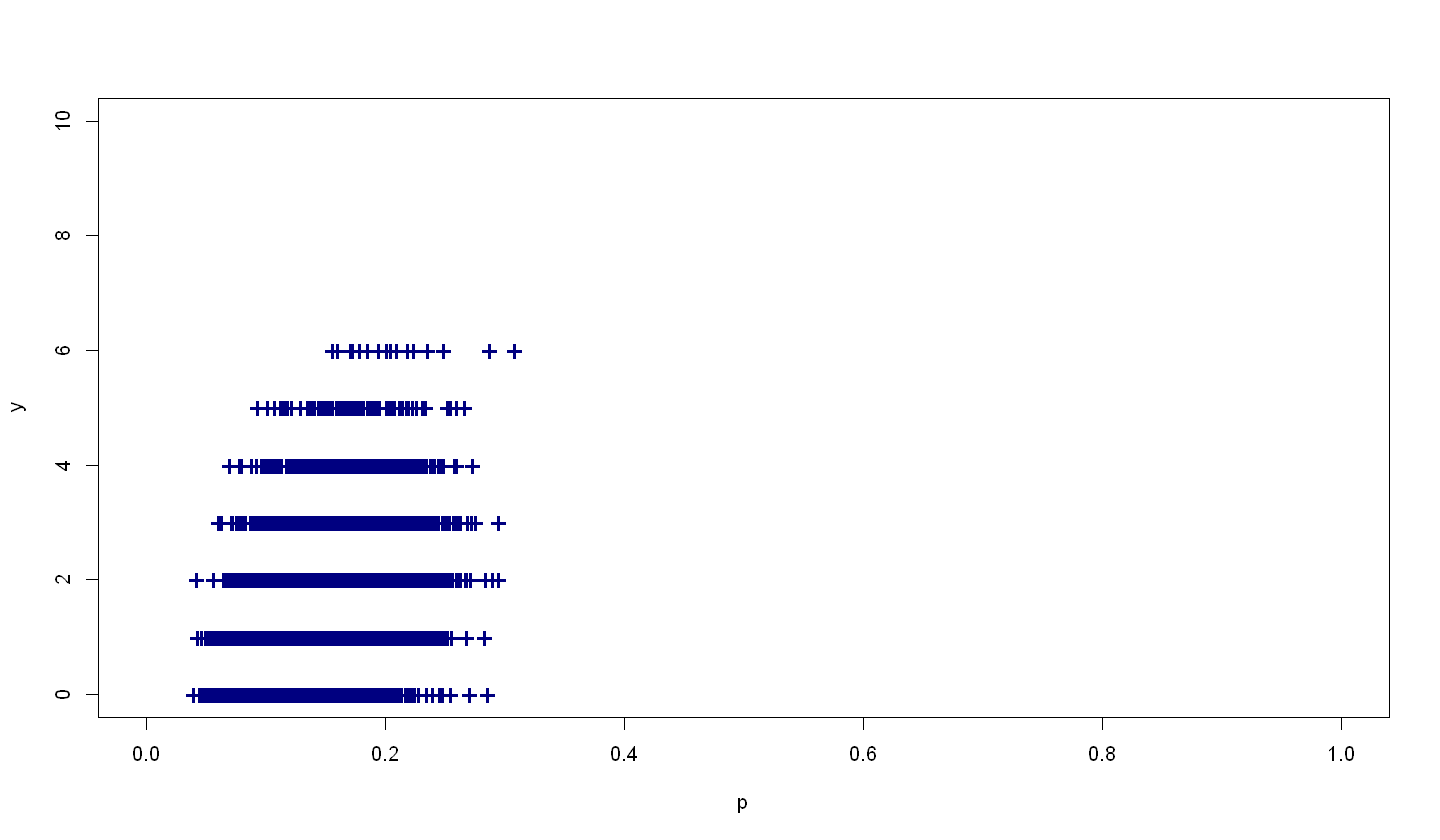

In [60]:
options(repr.plot.width = 12, repr.plot.height = 7)

# Let's format our chain
chain.df <- as.data.frame( as.mcmc(chain) )
cat(sprintf("\n Correlation matrix: \n"))
print(cor(chain.df))
#
# p inference result
#
hist(chain.df$p, nc=50, prob=TRUE , col='darkolivegreen2',
xlab='p', ylab='f(p)', main='Inference on p')
#
# next data prediction probability
#
ty <- table(chain.df$y)
barplot(ty/sum(ty), col='firebrick2', xlab='y', ylab='f(y)',
ylim=c(0,0.40),
main=sprintf('Number of successes in %d future trials', data$n_next))
#
# Correlation between p and predicted variable
#
plot(chain.df$p, chain.df$y, xlab='p', ylab='y', main="",
pch='+', col='navy', cex=1.5,
xlim=c(0,1), ylim=c(0,10))

In [61]:
sch<-summary(chain)
stat_values <- sch$statistics

cat(paste('Mean:', round(stat_values[1,'Mean'], 4)))
cat(paste('\nSD:', round(stat_values[[1,'SD']], 4)))
cat(paste('\nMedian', round(sch$quantiles[[1,'50%']], 4)))
cat(paste('\nThe confidence interval given by the chain is', round(sch$quantiles[[1,'2.5%']], 4),
          '-', round(sch$quantiles[[1,'97.5%']], 4)))

Mean: 0.1398
SD: 0.0375
Median 0.1371
The confidence interval given by the chain is 0.0749 - 0.2216